In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
class Board(object):
    
    def __init__(self, n=3, player_sym='x'):
        """      
        - n(default=3) int: The number of rows and columns in the tic-tac-toe board.
        - player_sym(default='x') str: The symbol chosen by a human player.
        """
        self.board = None
        self.reset_board(n)
        self.stale = False
        # Initalize the board

        self.sym_o = {
            'mark': 'O',
            'value': 1
        }
        # Setup the 'O' symbol

        self.sym_x = {
            'mark': 'X',
            'value': 2
        }
        # Setup the 'X' symbol

        self.sym_empty = {
            'mark': ' ',
            'value': 0
        }
        # Setup the default ' ' Symbol

        self.player_sym, self.bot_sym = (self.sym_x, self.sym_o) \
                                        if player_sym.lower() == 'x' \
                                        else (self.sym_o, self.sym_x)
        # Ensure different symbols are assigned to the bot and the player.

        self.winner = None
        # Initialize the winner as None

    def reset_board(self, n=3):
        """
        - n(default=3): int: The number of rows and columns in the tic-tac-toe board.
        Clear the board when the game is to be restarted or a new game has to be started.
        """
        self.board = np.zeros((n, n)).astype(int)
        self.winner = None
        
    def draw_char_for_item(self, item):
        """
        - item int: One of (1, 2, 0) representing the mark of the player, bot or empty.
        return: str
        """
        if item == self.sym_x.get('value'):
            # If item = 2 (value of symbol x, return mark of symbol x viz: 'X')
            return self.sym_x.get('mark')
        elif item == self.sym_o.get('value'):
            # If item = 1 (value of symbol o, return mark of symbol o viz: 'O')
            return self.sym_o.get('mark')
        else:
            # Otherwise the cell must be empty, as only 1, 2 have 'O','X' mapped onto them.
            return self.sym_empty.get('mark')

    def draw_board(self):
        """
        Prints a human friendly representation of the tic-tac-toe board
        """
        elements_in_board = self.board.size
        # Calculate the elements in the board

        items = [
            self.draw_char_for_item(self.board.item(item_idx)) 
            for item_idx in range(elements_in_board)
        ]
        # For each integer cell/element in the matrix, find the character mapped to it and store it in list
        board = """
             {} | {} | {}
            -----------
             {} | {} | {}
            -----------
             {} | {} | {}
        """.format(*items)
        # The *items expand to N arguments where N is the number of elements in items
        print(board)
        
    def have_same_val(self, axis, item, item_x, item_y):
        """
        - axis int: The direction along which operations are to be performed. Can have a value of 0 or 1 only.
            - 0 means row
            - 1 means column
        - item_x int: The row of the matrix in which item has been inserted.
        - item_y int: The column of the matrix in which the item has been inserted.
        - item int: The latest integer inserted into the matrix at row-index = item_x, and column-index = item_y. 
        """
        max_limit, _ = self.board.shape
        # Get the number of rows in the board.

        result = True
        # assuming the result to be true, unless proven wrong in the further steps.
        
        row_idx = col_idx = 0
        # set row_idx and col_idx iteration variables as 0
      

        main_idx, fixed_idx, ignore_idx = (col_idx, item_x, item_y) \
                                            if axis == 0 \
                                            else (row_idx, item_y, item_x)
        # main_idx: Update this index each iteration of the loop.
        # fixed_idx: Don't modify this index ever.
        # ignore_idx: this is the index of the inserted element which doesn't need to be evaluated, so ignore.
        # The if-else ensures weather to increment the row index or the column index according to the value of the axis.
        
        while main_idx < max_limit:
            # If the main_idx which starts at 0 is less than number of rows/cols in matrix.
            if main_idx != ignore_idx:
                # And main_idx is not equal to the index of the latest item inserted (ignore_idx)
                # because for a fixed_index if we compare main_idx and ignore_idx it would give us the 
                # latest element added, which will be equal to itself.
              
                board_item = self.board[fixed_idx][main_idx] \
                    if axis == 0 \
                    else self.board[main_idx][fixed_idx]
                # find the item(board_item) in the matrix 
                # corresponding to main_idx and the fixed_index.
                # It should be an element in the same row or column depending on the axis.
                
                if board_item != item or board_item == 0:
                    # If the board_item found is not equal to the latest item added
                    # or if the board item is 0, which is still not marked by bot or player,
                    # result is false as the function didn't find all 
                    # values to be same across the row, or column.
                    # and exit the loop because a single-mismatch is sufficient 
                    # to confirm that all elements are not same.
                    result = False
                    break
            main_idx += 1
        return result
    
    def left_diagonal_has_same_values(self, item, item_x, item_y):
        """
        params
        
        - item_x int: The row of the matrix in which item has been inserted.
        - item_y int: The column of the matrix in which the item has been inserted.
        - item int: The latest integer inserted into the matrix at row-index = item_x, and column-index = item_y. 
        """
        i = j = 0
        # set i, j to 0
        
        result = True
        # Optimistic approach, assume the result to be true, 
        # unless proven wrong in the further steps.
        
        max_limit, _ = self.board.shape
        # Get the number of rows in the board.
        
        while i < max_limit:
            # The row index i is sufficient as i and j are incremented 
            # by same factor resulting in same values (Either would do)
            if i != item_x:
                # Avoid checking for the latest item added as that's what we are comparing with
                if self.board[i][j] != item or self.board[i][j] == 0:
                    # If the board_item found is not equal to the latest item added
                    # result is false as the function didn't find all 
                    # values to be same across the row, or column.
                    # and exit the loop because a single-mismatch is sufficient 
                    # to confirm that all elements are not same.
                    result = False
                    break
            i += 1
            j += 1
        return result

    def right_diagonal_has_same_values(self, item, item_x, item_y):
        """
        params
        
        - item_x int: The row of the matrix in which item has been inserted.
        - item_y int: The column of the matrix in which the item has been inserted.
        - item int: The latest integer inserted into the matrix at row-index = item_x, and column-index = item_y. 
        """
        result = True
        max_limit, _ = self.board.shape
        i = 0
        j = max_limit - 1
        while i < max_limit:
            # The row index i is sufficient as i and j are incremented 
            # by same factor resulting in same values (Either would do)
            if i != item_x:
                # Avoid checking for the latest item added as that's what we are comparing with
                if self.board[i][j] != item or self.board[i][j] == 0:
                    # If the board_item found is not equal to the latest item added
                    # result is false as the function didn't find all 
                    # values to be same across the row, or column.
                    # and exit the loop because a single-mismatch is sufficient 
                    # to confirm that all elements are not same.
                    result = False
                    break
            i += 1
            j -= 1
        return result

    def cols_have_same_values(self, item, item_x, item_y):
        """
        Check if any of the columns have same values
        
        - item_x int: The row of the matrix in which item has been inserted.
        - item_y int: The column of the matrix in which the item has been inserted.
        - item int: The latest integer inserted into the matrix at row-index = item_x, and column-index = item_y. 
        """
        axis = 1
        return self.have_same_val(axis, item, item_x, item_y)

    def rows_have_same_values(self, item, item_x, item_y):
        """
        Check if any of the rows have same values

        - item_x int: The row of the matrix in which item has been inserted.
        - item_y int: The column of the matrix in which the item has been inserted.
        - item int: The latest integer inserted into the matrix at row-index = item_x, and column-index = item_y. 
        """
        axis = 0
        return self.have_same_val(axis, item, item_x, item_y)
    
    def element_diagonal_has_same_value(self, item, item_x, item_y):
        """
        Check if any of the diagonals have same values
  
        - item_x int: The row of the matrix in which item has been inserted.
        - item_y int: The column of the matrix in which the item has been inserted.
        - item int: The latest integer inserted into the matrix at row-index = item_x, and column-index = item_y. 
        """
        max_limit, _ = self.board.shape
        if item_x == item_y and item_x + item_y == max_limit - 1:
            return self.left_diagonal_has_same_values(item, item_x, item_y) or \
            self.right_diagonal_has_same_values(item, item_x, item_y)
        
        if item_x == item_y:
            # elements on the left diagonal have same row and column value.
            return self.left_diagonal_has_same_values(item, item_x, item_y)

        if item_x + item_y == max_limit - 1:
            # elements on the right diagonal have sum of the row and column value as the same number.
            return self.right_diagonal_has_same_values(item, item_x, item_y)
        # Else, it is not either of the diagonals
        return False
    
    def is_game_over(self, player, item, item_x, item_y):
        """
        Check if the game is over, which is defined by a row, column or diagonal having 
        the same values as the latest inserted integer item
 
        - item_x int: The row of the matrix in which item has been inserted.
        - item_y int: The column of the matrix in which the item has been inserted.
        - item int: The latest integer inserted into the matrix at row-index = item_x, and column-index = item_y. 
        """
        return self.cols_have_same_values(item, item_x, item_y) or \
                    self.rows_have_same_values(item, item_x, item_y) or \
                    self.element_diagonal_has_same_value(item, item_x, item_y)

    def is_winning_move(self, player, item, item_x, item_y):
        """
        Check if the last move was a winning move, which is defined by a row, column or diagonal having 
        the same values as the latest inserted integer item

        - item_x int: The row of the matrix in which item has been inserted.
        - item_y int: The column of the matrix in which the item has been inserted.
        - item int: The latest integer inserted into the matrix at row-index = item_x, and column-index = item_y. 
        """
        if self.is_game_over(player, item, item_x, item_y):
            self.winner = player
            return True
        return False
    
    def is_stale(self):
        """
        Checks if there is no vacant space on the board
        """
        x, y = np.where(self.board == 0)
        if len(x) == 0 and len(y) == 0:
            self.stale = True
        return self.stale
            
    
    def player_move(self, input_symbol, item_x, item_y):
        """
        The method which facilitates insertion of values into the board matrix.
    
        - input_symbol: 'X' or 'O'
        - item_x int: The row of the matrix in which item has been inserted.
        - item_y int: The column of the matrix in which the item has been inserted.
        """
        symbol = None
        
        if input_symbol == self.sym_o.get('mark'):
            # If 'O' was inserted
            symbol = self.sym_o
        
        elif input_symbol == self.sym_x.get('mark'):
            # If 'X' was inserted
            symbol = self.sym_x

        else:
            # invalid symbol
            return
        if self.board[item_x][item_y] == 0:
            self.board[item_x][item_y] = symbol.get('value')
            # insert the integer corresponding to the symbol in to the matrix.

            self.draw_board()
            # Show the board in a human friendly format for evaluation.

            if self.is_winning_move(symbol.get('mark'), symbol.get('value'), item_x, item_y):
                # If this move was a winning move, declare the symbol as the winner.
                print('Winner is: {}'.format(self.winner))
                return self.winner
            elif self.is_stale():
                print('Draw')
                return 'draw'
        
    def play(self, item_x, item_y):
        """
        The method exposed to a human user
        facilitates insertion of values into the board matrix.
   
        - input_symbol: 'X' or 'O'
        - item_x int: The row of the matrix in which item has been inserted.
        - item_y int: The column of the matrix in which the item has been inserted.
        """
        max_limit, _ = self.board.shape
        if item_x > max_limit - 1 or item_y > max_limit:
            # If the row, column values dont' exist in the board matrix. 
            # Exit without inserting it into the board.
            return
        self.player_move(self.player_sym.get('mark'), item_x, item_y)
        
    def bot_play(self, item_x, item_y):
        """
        The method exposed to a bot
        facilitates insertion of values into the board matrix.

        - input_symbol: 'X' or 'O'
        - item_x int: The row of the matrix in which item has been inserted.
        - item_y int: The column of the matrix in which the item has been inserted.
        """
        max_limit, _ = self.board.shape
        if item_x > max_limit - 1 or item_y > max_limit:
            return
        self.player_move(self.bot_sym.get('mark'), item_x, item_y)

In [24]:
class Agent(object):
    def __init__(self, exploration_rate=0.33, learning_rate=0.5, discount_factor=0.01):
        """
        An agent is a problem solver. 
        It should perform actions like:
            - plotting a symbol on the tic-tac-toe board if it is vacant.
            - Remember which states are more profitable than the others.
            - Explore better states
            - Exploit for maximum profit
      
        - exploration_rate: A floating point number < 1 
                which defines the agents probability to explore.
        - learning_rate: Used for assessing the value of intermediate 
                states during temporal difference learning.
        - discount_factor: The factor by which a reward must be reduced 
                to be passed on for intermediate states
        """
        self.states = {}
        # The list of states, a linear representation of the 3x3 tic tac toe board
        self.state_order = []
        # The order in which the agent progressed through states to be able to 
        # assign discounted rewards to older states.
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_rate = exploration_rate

    @staticmethod
    def serialize_board(board):
     
        serialized_board = board.flatten()
        return ''.join([str(i) for i in serialized_board.flatten().tolist()])

    def get_serious(self):
        """
        Quit exploring states and start exploiting
        Use this if you want to play with the agent.
        """
        self.exploration_rate = 0
    
    def learn_by_temporal_difference(self, reward, new_state_key, state_key):
        """
        Implementation of the temporal difference formula.
        """
        old_state = self.states.get(state_key, np.zeros((3,3)))
        return self.learning_rate * ((reward * self.states[new_state_key]) - old_state)

    def set_state(self, old_board, action):
        """
        Store the action performed for a given state
        """
        state_key = Agent.serialize_board(old_board)
        self.state_order.append((state_key, action))

    def on_reward(self, reward):
        """
        Assign rewards to actions performed on intermediate states.
        """
        if len(self.state_order) == 0:
            return None
        new_state_key, new_action = self.state_order.pop()
        # get the latest state and the action performed that led to the reward

        self.states[new_state_key] = np.zeros((3,3))
        # initialize the value with a zero matrix

        self.states[new_state_key].itemset(new_action, reward)
        # Assign the reward to this state
        
        while self.state_order:
            # while there is a stack of states (that were caused by actions performed)

            state_key, action = self.state_order.pop()
            # get the state and action performed on it
            
            reward *= self.discount_factor
            # Reduce the original reward (self.discount_factor is a number < 1)
            
            # Implementation of the value function
            if state_key in self.states:
                reward += self.learn_by_temporal_difference(reward, new_state_key, state_key).item(new_action)
                # If this state was encountered due to a different experiment, increase its previous value
                self.states[state_key].itemset(action, reward)
            else:
                self.states[state_key] = np.zeros((3,3))
                reward = self.learn_by_temporal_difference(reward, new_state_key, state_key).item(new_action)
                self.states[state_key].itemset(action, reward)
                # If this state was not encountered before, assign it the discounted reward as its value                
            new_state_key = state_key
            new_action = action
            
    def select_move(self, board):
        """
        Choose from exploration and exploitation.
        """
        state_key = Agent.serialize_board(board)
        exploration = np.random.random() < self.exploration_rate
        print('explore' if exploration or state_key not in self.states else 'exploit')
        action = self.explore_board(board) \
                    if exploration or state_key not in self.states \
                    else self.exploit_board(state_key)
        print(action)
        self.set_state(board, action)
        return action

    def explore_board(self, board):
        """
        Find an empty cell from the board
        """
        zero_x, zero_y = np.where(board == 0)
        vacant_cells = [(x, y) for x, y in zip(zero_x, zero_y)]
        randomly_selected_vacant_cell = np.random.choice(len(vacant_cells))
        return vacant_cells[randomly_selected_vacant_cell]
        
    def exploit_board(self, state_key):
        """
        Find the best action for the given state
        """
        state_values = self.states[state_key]
        # For the current state get the matrix of accumulated rewards
        print('State rewards')
        print(state_values)
        
        best_actions_x, best_actions_y = np.where(state_values == state_values.max())
        # Find the coordinates which correspond to highest reward
        
        best_value_indices = [(x, y) for x,y in zip(best_actions_x, best_actions_y)]
        select_index = np.random.choice(len(best_value_indices))
        return best_value_indices[select_index]

In [25]:
bot1_sym = 'O'
bot2_sym = 'X'

def optimize_bot(game, bot1, bot2):
    """
    Punish or Reward the bot with respect to the agent that wins the game
    """
    if game.winner == bot1_sym:
        bot1.on_reward(1)
        # reward
        bot2.on_reward(-1)
        # punishment
    elif game.winner == bot2_sym:
        bot1.on_reward(-1)
        bot2.on_reward(1) 
    
def train(epochs, bot1, bot2):
    bot1_wins = 0
    bot2_wins = 0
    win_trace = pd.DataFrame(data=np.zeros((epochs, 2)), columns=['bot1', 'bot2'])
    for i in range(epochs):
        print('-' * 100)
        print('epoch: {}'.format(i + 1))
        game = Board()
        while not game.stale:
            # Exit if the board is full
            
            winner = game.player_move(bot2_sym, *bot2.select_move(game.board))
            if winner:
                optimize_bot(game, bot1, bot2)
                bot2_wins += 1
                win_trace.set_value(i, 'bot2', 1)
                break
                win_trace[i] = 2
            elif winner == 'draw':
                break
    return win_trace, bot1_wins, bot2_wins

In [26]:
bot = Agent()
bot2 = Agent()
epochs = 5000
win_trace, bot1_wins, bot2_wins = train(epochs, bot, bot2)

----------------------------------------------------------------------------------------------------
epoch: 1
explore
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   |  
        
explore
(1, 0)

               |   | X
            -----------
             X |   |  
            -----------
               |   |  
        
explore
(2, 0)

               |   | X
            -----------
             X |   |  
            -----------
             X |   |  
        
explore
(0, 1)

               | X | X
            -----------
             X |   |  
            -----------
             X |   |  
        
explore
(2, 1)

               | X | X
            -----------
             X |   |  
            -----------
             X | X |  
        
explore
(0, 0)

             X | X | X
            -----------
             X |   |  
            -----------
             X | X |  
        
Winner is: X
-------------------------

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



State rewards
[[  0.00000000e+00   1.51073910e-06   0.00000000e+00]
 [  0.00000000e+00   1.50369630e-04   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00]]
(1, 1)

               |   |  
            -----------
             X | X |  
            -----------
             X |   |  
        
explore
(0, 1)

               | X |  
            -----------
             X | X |  
            -----------
             X |   |  
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  0.  1.]
 [ 0.  0.  0.]]
(1, 2)

               | X |  
            -----------
             X | X | X
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 60
exploit
State rewards
[[  7.81250000e-19   7.81250000e-19  -7.47159584e-07]
 [  1.25000004e-13   1.24375008e-11  -6.25000039e-12]
 [  1.50380424e-08   1.40860177e-13  -6.24999942e-14]]
(2, 0)

               |   |  
    

State rewards
[[  0.00000000e+00   0.00000000e+00   1.51136419e-06]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [ -7.44431813e-09   0.00000000e+00   1.49992443e-02]]
(2, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   | X
        
exploit
State rewards
[[ 0.  0.  1.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 2)

               |   | X
            -----------
               |   | X
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 87
explore
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[  0.00000000e+00   1.25000008e-09  -7.50612374e-05]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  7.81250000e-19   1.25000004e-11   0.00000000e+00]]
(0, 1)

               | X |  
     


             X |   | X
            -----------
             X |   | X
            -----------
               | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 109
explore
(2, 1)

               |   |  
            -----------
               |   |  
            -----------
               | X |  
        
exploit
State rewards
[[  0.00000000e+00   1.25000008e-11  -7.49848864e-03]
 [  0.00000000e+00   1.50000000e-02   7.81250000e-19]
 [  0.00000000e+00   0.00000000e+00   1.25000008e-11]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               | X |  
        
exploit
State rewards
[[ 0.  1.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 1)

               | X |  
            -----------
               | X |  
            -----------
               | X |  
        
Winner is: X
------------------------------------------------------------------------

(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               | X |  
        
explore
(1, 1)

               |   |  
            -----------
             X | X |  
            -----------
               | X |  
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  0.  1.]
 [ 0.  0.  0.]]
(1, 2)

               |   |  
            -----------
             X | X | X
            -----------
               | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 140
exploit
State rewards
[[ -4.34199006e-09   1.30574632e-09  -1.16517888e-08]
 [  1.28863545e-08  -7.51224546e-07   8.78423265e-09]
 [  4.30350089e-09  -7.32251633e-05   1.51119336e-04]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[  0.00000000e+00   0.00000000e+00   2.50628141e-07]
 [

----------------------------------------------------------------------------------------------------
epoch: 159
exploit
State rewards
[[ -4.34199006e-09   1.30574632e-09   1.47968919e-08]
 [  1.51070510e-06  -4.36705319e-09   8.78423265e-09]
 [  8.59492767e-09  -3.62956515e-05   1.07152870e-08]]
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[  0.00000000e+00   1.51124378e-04  -7.50612374e-05]
 [  0.00000000e+00   0.00000000e+00   1.24375008e-09]
 [  1.51125000e-04   1.25000004e-11   0.00000000e+00]]
(2, 0)

               |   |  
            -----------
             X |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[  0.00000000e+00   1.51073910e-06   0.00000000e+00]
 [  0.00000000e+00   1.50000000e-02   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00]]
(1, 1)

               |   |  
            -----------
          

exploit
State rewards
[[ -4.34199006e-09   1.30574632e-09  -3.66678312e-05]
 [ -3.45079130e-10  -4.36705319e-09  -7.55484781e-05]
 [  8.59492767e-09   1.07215370e-08   1.07215370e-08]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[  0.00000000e+00   0.00000000e+00   2.50628141e-07]
 [  7.81250000e-19   0.00000000e+00   1.51136419e-06]
 [  1.25000008e-09   0.00000000e+00   0.00000000e+00]]
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   | X
        
explore
(0, 0)

             X |   |  
            -----------
               |   | X
            -----------
               |   | X
        
explore
(1, 1)

             X |   |  
            -----------
               | X | X
            -----------
               |   | X
        
Winner is: X
-----------------------------------------------------------------

exploit
State rewards
[[  1.12500063e-08   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   1.51119375e-04]
 [  1.00000000e+00   0.00000000e+00   0.00000000e+00]]
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 208
exploit
State rewards
[[ -4.34199006e-09   1.30574632e-09   5.48924565e-06]
 [ -3.45079130e-10   1.51153673e-06  -3.78282549e-05]
 [ -7.95325635e-06   1.51125897e-04  -1.79351374e-09]]
(2, 1)

               |   |  
            -----------
               |   |  
            -----------
               | X |  
        
exploit
State rewards
[[  0.00000000e+00  -2.54368640e-07  -7.49848864e-03]
 [ -7.34887500e-03  -3.67387506e-03  -2.54371765e-07]
 [  0.00000000e+00   0.00000000e+00   1.50000000e-02]]
(2, 2)

               |   |  
            ---------

 [ -7.44431813e-09   0.00000000e+00   1.49999924e-02]]
(2, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   | X
        
exploit
State rewards
[[ 0.  0.  1.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 2)

               |   | X
            -----------
               |   | X
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 232
exploit
State rewards
[[ -4.34199006e-09   1.30574632e-09  -3.54328984e-07]
 [ -7.51210246e-07   1.51125871e-04   1.51125820e-04]
 [ -8.66607366e-09   1.72822711e-08  -1.79351374e-09]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
explore
(1, 0)

               |   |  
            -----------
             X | X |  
            -----------
               |   |  
        
explore
(1, 2)

       

exploit
State rewards
[[  0.00000000e+00   4.95637282e-07   5.01262688e-09]
 [  1.50380936e-06   0.00000000e+00  -2.40318353e-07]
 [  0.00000000e+00  -2.49381344e-09   0.00000000e+00]]
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
             X |   |  
        
explore
(1, 1)

               |   |  
            -----------
             X | X |  
            -----------
             X |   |  
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  0.  1.]
 [ 0.  0.  0.]]
(1, 2)

               |   |  
            -----------
             X | X | X
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 259
exploit
State rewards
[[ -5.66571435e-05   1.30574632e-09  -1.77585226e-05]
 [ -6.08965643e-10  -3.78229842e-05  -3.85208930e-05]
 [  1.51166868e-06   1.72822711e-08   1.79453572e-04]]
(2, 2)

               |   

 [ -7.49855223e-03   0.00000000e+00   1.63855008e-06]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               | X |  
        
exploit
State rewards
[[ 0.  1.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 1)

               | X |  
            -----------
               | X |  
            -----------
               | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 284
exploit
State rewards
[[ -5.66571435e-05   1.92604476e-05  -4.64910982e-07]
 [ -6.08965643e-10   5.29204656e-09  -3.85208930e-05]
 [  1.54181362e-08   1.51123645e-04  -4.63751749e-05]]
(2, 1)

               |   |  
            -----------
               |   |  
            -----------
               | X |  
        
exploit
State rewards
[[  0.00000000e+00  -2.54368640e-07  -7.49848864e-03]
 [ -7.34887500e-03   1.50001272e-02  -2.54371765e-07]
 [ -7.49855223e-03   0.00000000e+00

[[ -5.66571435e-05   4.29990847e-10  -4.64910982e-07]
 [ -6.08965643e-10   5.29204656e-09  -3.85208930e-05]
 [  1.51166868e-06  -1.84988932e-05  -4.63751749e-05]]
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[  0.00000000e+00   4.95637282e-07   5.01262688e-09]
 [  1.51125000e-04   0.00000000e+00  -2.40318353e-07]
 [  0.00000000e+00  -2.47806141e-07   0.00000000e+00]]
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[  0.00000000e+00   5.00637531e-07   0.00000000e+00]
 [  0.00000000e+00   1.50000000e-02   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00]]
(1, 1)

               |   |  
            -----------
             X | X |  
            -----------
             X |   |  
        
explore
(0, 2)

               |   | X
            -----------
  

State rewards
[[ -7.46830674e-07   4.29990847e-10   1.61517538e-08]
 [ -3.86904116e-06   2.02057178e-04   1.50871817e-06]
 [ -1.48791652e-06  -1.84988932e-05  -1.01864406e-04]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
explore
(1, 0)

               |   |  
            -----------
             X | X |  
            -----------
               |   |  
        
exploit
State rewards
[[  5.01250000e-05   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00]]
(1, 2)

               |   |  
            -----------
             X | X | X
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 334
exploit
State rewards
[[ -7.46830674e-07   4.29990847e-10   1.61517538e-08]
 [ -3.86904116e-06   1.5305

explore
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   | X
        
explore
(1, 0)

             X |   |  
            -----------
             X |   |  
            -----------
               |   | X
        
exploit
State rewards
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   1.25000000e-07]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00]]
(1, 2)

             X |   |  
            -----------
             X |   | X
            -----------
               |   | X
        
exploit
State rewards
[[ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.005  0.   ]]
(2, 1)

             X |   |  
            -----------
             X |   | X
            -----------
               | X | X
        
exploit
State rewards
[[ 0.  0.  1.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 2)

             X |   | X
            -----------
             X |   | X
            ----------

        
exploit
State rewards
[[ -2.10706123e-04   1.63667358e-06   0.00000000e+00]
 [  3.81193852e-07  -3.67374969e-03   0.00000000e+00]
 [  1.51250309e-04  -7.32160397e-07  -2.50618781e-07]]
(2, 0)

               |   | X
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[ 0.         -0.00734887  0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.015     ]]
(2, 2)

               |   | X
            -----------
               |   |  
            -----------
             X |   | X
        
explore
(0, 1)

               | X | X
            -----------
               |   |  
            -----------
             X |   | X
        
exploit
State rewards
[[ 1.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 0)

             X | X | X
            -----------
               |   |  
            -----------
             X |   | X
        
Winner is: X
-----------------------------------------

(1, 0)

             X |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.015  0.   ]]
(2, 1)

             X |   |  
            -----------
             X |   |  
            -----------
               | X |  
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 1.  0.  0.]]
(2, 0)

             X |   |  
            -----------
             X |   |  
            -----------
             X | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 408
explore
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[  3.90457615e-05   1.51254216e-06  -7.50687946e-05]
 [  1.51125000e-04   5.01262688e-09   0.00000000e+00]
 [ -7.44431813e-09   0.00000000e+00  -

exploit
State rewards
[[ 0.  1.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 1)

             X | X | X
            -----------
             X |   |  
            -----------
               | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 433
exploit
State rewards
[[ -2.28512440e-05  -8.02536512e-07   3.75292151e-05]
 [ -7.50208813e-05  -7.54543587e-05   1.16455989e-06]
 [  2.41385210e-07   1.59006141e-06  -9.14515701e-05]]
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ -2.10706123e-04   1.63667358e-06   0.00000000e+00]
 [  1.87744439e-06   1.49243748e-02   0.00000000e+00]
 [  1.51250309e-04  -7.32160397e-07   6.93027402e-07]]
(1, 1)

               |   | X
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.  0.  0.

(0, 1)

               | X | X
            -----------
               |   |  
            -----------
               | X |  
        
exploit
State rewards
[[ 1.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 0)

             X | X | X
            -----------
               |   |  
            -----------
               | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 456
exploit
State rewards
[[ -2.28512440e-05  -8.02536512e-07   5.48416166e-07]
 [ -7.50208813e-05  -7.54543587e-05   1.16455989e-06]
 [ -7.31305054e-05   4.82998146e-07  -4.67812274e-05]]
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[  3.90457615e-05   1.51254216e-06  -7.50687946e-05]
 [  1.31602119e-04   5.01262688e-09   0.00000000e+00]
 [ -7.44431813e-09   0.00000000e+00  -7.40511358e-05]]
(1, 0)

               |   |  
    

explore
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
explore
(2, 0)

             X |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
explore
(2, 1)

             X |   |  
            -----------
               |   |  
            -----------
             X | X |  
        
explore
(0, 2)

             X |   | X
            -----------
               |   |  
            -----------
             X | X |  
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  0.]]
(1, 1)

             X |   | X
            -----------
               | X |  
            -----------
             X | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 481
exploit
State rewards
[[  2.19126589e-07  -6.88341283e-06   1.52874236e-05]
 [ -4.15044949e-07   1.379940

exploit
State rewards
[[  5.74310057e-05   4.39075184e-09  -7.50612374e-05]
 [  0.00000000e+00  -3.74943750e-03   1.68747187e-02]
 [  2.02584375e-03   2.02584375e-03   1.51074232e-06]]
(1, 2)

               |   |  
            -----------
             X |   | X
            -----------
               |   |  
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  0.]]
(1, 1)

               |   |  
            -----------
             X | X | X
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 508
exploit
State rewards
[[  2.19126589e-07  -1.55215093e-05  -5.35182944e-07]
 [  1.70225687e-04  -3.71042225e-05  -1.09437221e-07]
 [ -4.23196356e-07  -2.75735764e-05   8.60304767e-07]]
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[  5.7431005

(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[  1.26073399e-08   1.12933906e-06  -7.50687946e-05]
 [  1.88659397e-04   5.01262688e-09   0.00000000e+00]
 [  2.19559195e-09   0.00000000e+00  -7.40511358e-05]]
(1, 0)

               |   |  
            -----------
             X |   | X
            -----------
               |   |  
        
exploit
State rewards
[[ 0.     0.     0.015]
 [ 0.     1.     0.   ]
 [ 0.     0.     0.   ]]
(1, 1)

               |   |  
            -----------
             X | X | X
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 534
exploit
State rewards
[[  1.71540441e-06  -3.73053530e-05   4.29328120e-06]
 [  1.41696301e-05  -3.71042225e-05   1.44040160e-04]
 [ -8.42588553e-07  -2.75735764e-05   7.46133633e-05]]
(1, 2)



epoch: 560
exploit
State rewards
[[  1.36367058e-04  -1.03524840e-05   4.29328120e-06]
 [  2.37124270e-05  -2.04893718e-05  -4.07783120e-05]
 [  2.98881005e-05   2.11464963e-04  -5.52653802e-05]]
(2, 1)

               |   |  
            -----------
               |   |  
            -----------
               | X |  
        
exploit
State rewards
[[  6.92089156e-07   1.50305725e-04   7.57177563e-05]
 [  9.38957602e-04   1.31714197e-02  -1.87313425e-03]
 [ -6.43458485e-03   0.00000000e+00   1.82172924e-02]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               | X | X
        
explore
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               | X | X
        
exploit
State rewards
[[ 0.     0.     0.005]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]]
(0, 2)

               |   | X
            -----------
             X |   |  
            -----------
            

 [ 0.  0.  0.]]
(0, 1)

               | X |  
            -----------
               | X |  
            -----------
               | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 592
exploit
State rewards
[[  1.55934867e-04  -1.03524840e-05  -7.61763423e-05]
 [ -1.46870777e-06   1.30790459e-04   2.95253541e-06]
 [ -9.24751733e-06   3.40220648e-06  -5.52653802e-05]]
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[  0.00000000e+00   0.00000000e+00   1.51136419e-06]
 [ -3.66712632e-05   0.00000000e+00   1.50369318e-04]
 [  1.50183356e-02   0.00000000e+00   1.50000000e-02]]
(2, 0)

             X |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
explore
(2, 2)

             X |   |  
            -----------
               |   |  
 

State rewards
[[  7.51884007e-03  -7.49847060e-03   1.13444850e-04]
 [  7.81250000e-19   1.51124375e-04   7.21456854e-08]
 [  1.25000008e-09  -4.59345071e-03   0.00000000e+00]]
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   | X
        
explore
(0, 2)

             X |   | X
            -----------
               |   |  
            -----------
               |   | X
        
explore
(0, 1)

             X | X | X
            -----------
               |   |  
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 611
exploit
State rewards
[[  7.41910709e-07  -1.03524840e-05  -7.61763423e-05]
 [ -1.46870777e-06  -1.98190240e-05   1.51581658e-06]
 [ -6.76675883e-05  -2.43731702e-06   5.73114954e-07]]
(1, 2)

               |   |  
            -----------
               |   | X
            -----

 [ -6.43458485e-03   0.00000000e+00  -4.67967437e-04]]
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               | X |  
        
exploit
State rewards
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  1.51136419e-06   0.00000000e+00  -3.66712632e-05]]
(2, 0)

             X |   |  
            -----------
               |   |  
            -----------
             X | X |  
        
explore
(1, 0)

             X |   |  
            -----------
             X |   |  
            -----------
             X | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 638
explore
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[  9.44025749e-05  -7.49847060e-03   1.13444850e-04]
 [  7.8

 [ 0.     0.015  0.   ]]
(0, 2)

               |   | X
            -----------
               |   | X
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 666
exploit
State rewards
[[  7.41910709e-07  -1.03524840e-05   2.23753348e-06]
 [ -1.46870777e-06  -7.96368516e-05   7.57302827e-07]
 [ -1.55611108e-06  -2.96476878e-05   1.50170632e-04]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
explore
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   | X
        
explore
(0, 1)

               | X |  
            -----------
               | X |  
            -----------
               |   | X
        
explore
(1, 2)

               | X |  
            -----------
               | X | X
            -----------
   

explore
(2, 0)

               |   |  
            -----------
             X |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[  1.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   1.51125000e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00]]
(0, 0)

             X |   |  
            -----------
             X |   |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 689
explore
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ -2.10706123e-04   1.63667358e-06   0.00000000e+00]
 [  1.50369318e-04   6.93027402e-07  -7.49811835e-03]
 [  1.51136419e-06   1.50052282e-04  -7.36732948e-05]]
(1, 0)

               |   | X
            -----------
             X |   |  
         

State rewards
[[ 0.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  0.]]
(1, 0)

             X |   |  
            -----------
             X |   |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 715
exploit
State rewards
[[ -7.51132946e-05  -9.10183893e-05   3.68215266e-05]
 [  6.57880755e-05  -4.60783098e-06   3.79420241e-05]
 [  1.89053552e-04   4.16676709e-08   4.15116473e-07]]
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[  1.50366402e-02  -9.79769489e-07   1.51063268e-04]
 [ -7.32804521e-05   1.49244684e-02   7.59019180e-05]
 [  0.00000000e+00  -7.55623489e-05   7.55933660e-05]]
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 1. 

State rewards
[[ 1.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 0)

             X |   |  
            -----------
               | X |  
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 741
exploit
State rewards
[[ -1.92444583e-07   1.50162196e-05  -6.17600869e-05]
 [ -2.70249802e-05  -4.60783098e-06  -6.74678647e-06]
 [ -9.23715859e-05   4.16676709e-08   1.20141483e-04]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[  6.56973093e-03  -5.52110609e-05   1.50065235e-02]
 [  7.81250000e-19   1.17151345e-02  -1.30470831e-05]
 [ -1.30470831e-05  -4.86982537e-04   0.00000000e+00]]
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0. 

 [  0.00000000e+00   1.51062500e-04   0.00000000e+00]]
(1, 1)

               | X | X
            -----------
               | X |  
            -----------
               |   | X
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 1.  0.  0.]]
(2, 0)

               | X | X
            -----------
               | X |  
            -----------
             X |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 766
exploit
State rewards
[[ -9.18341470e-05  -7.65544510e-05  -7.18863752e-05]
 [ -3.05074027e-07  -5.99956334e-06  -5.62832690e-06]
 [ -9.23715859e-05   4.16676709e-08   3.75041263e-05]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
explore
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   | X
        
exploit
State rewards
[

 [ 0.  0.  1.]]
(2, 2)

             X |   | X
            -----------
               |   | X
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 795
exploit
State rewards
[[  4.76971571e-05   3.01489476e-06   1.49990647e-04]
 [  4.65329047e-06  -5.99956334e-06  -2.23524303e-05]
 [ -9.23715859e-05  -1.65624003e-05   1.53139128e-04]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[  1.48026919e-02  -7.73129066e-05   1.57648542e-04]
 [  7.81250000e-19   3.94616269e-04   1.49211757e-02]
 [ -4.56131897e-05  -7.39983457e-03   0.00000000e+00]]
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   | X
        
exploit
State rewards
[[ 0.  0.  1.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 2)

           

 [ 0.  0.  0.]]
(1, 1)

               | X |  
            -----------
               | X |  
            -----------
               | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 819
explore
(2, 1)

               |   |  
            -----------
               |   |  
            -----------
               | X |  
        
exploit
State rewards
[[  1.87945749e-04   1.51977894e-03   7.57177563e-05]
 [ -3.17217404e-04   1.60120066e-04  -1.87313425e-03]
 [ -7.36414983e-05   0.00000000e+00  -2.73730788e-03]]
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
               | X |  
        
exploit
State rewards
[[ -2.54371875e-05   0.00000000e+00   0.00000000e+00]
 [  1.51124375e-04   0.00000000e+00   1.25000008e-09]
 [  0.00000000e+00   0.00000000e+00   1.50000000e-02]]
(2, 2)

               | X |  
            -----------
               |   |  
 


               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
explore
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               |   | X
        
explore
(0, 0)

             X |   |  
            -----------
             X |   |  
            -----------
               |   | X
        
exploit
State rewards
[[ 0.          0.          0.015     ]
 [ 0.          0.          0.00015112]
 [ 0.          0.          0.        ]]
(0, 2)

             X |   | X
            -----------
             X |   |  
            -----------
               |   | X
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 1.  0.  0.]]
(2, 0)

             X |   | X
            -----------
             X |   |  
            -----------
             X |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------


               |   |  
            -----------
               |   | X
            -----------
               |   | X
        
exploit
State rewards
[[ 0.  0.  1.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 2)

               |   | X
            -----------
               |   | X
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 869
exploit
State rewards
[[ -3.35188474e-05   1.11963130e-05  -2.46803211e-05]
 [ -2.92135953e-05  -6.32720998e-06  -2.23524303e-05]
 [ -6.31616294e-06   1.11905814e-05   1.62169051e-04]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
explore
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   | X
        
explore
(2, 0)

               |   | X
            -----------
               |   |  

 [ -1.55228314e-04   1.82123689e-06  -8.01885217e-05]]
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[  0.00000000e+00   0.00000000e+00   5.17373832e-07]
 [  7.55625838e-07   1.13497190e-06  -9.22266728e-07]
 [ -1.00452036e-06  -7.50581079e-07   7.52784586e-07]]
(1, 1)

               | X |  
            -----------
               | X |  
            -----------
               |   |  
        
explore
(0, 2)

               | X | X
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.     0.     0.   ]
 [ 0.015  0.     0.015]
 [ 0.     0.     0.   ]]
(1, 2)

               | X | X
            -----------
               | X | X
            -----------
               |   |  
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 1.  0.  0.]]
(2, 0)

               | X | X
            ----------

State rewards
[[ -4.76463233e-06   1.68185271e-02   9.55949198e-06]
 [ -3.17217404e-04  -3.63705425e-03   1.43662123e-06]
 [ -7.36414983e-05   0.00000000e+00  -2.73730788e-03]]
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
               | X |  
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  0.]]
(1, 1)

               | X |  
            -----------
               | X |  
            -----------
               | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 918
explore
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
               |   |  
        
explore
(2, 2)

               | X |  
            -----------
               |   |  
            -----------
               |   | X
        
explore
(2, 0)

               | X |  
            -----------
               

        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 942
exploit
State rewards
[[  4.72220641e-07   4.89505604e-07  -5.70297209e-05]
 [ -5.58528715e-05  -4.07494976e-06  -2.34410700e-07]
 [  3.03899105e-05  -1.81343586e-05  -8.01885217e-05]]
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[  2.00124894e-06  -9.79769489e-07   1.87487424e-04]
 [ -7.32804521e-05   5.10739725e-07  -7.36719517e-03]
 [  0.00000000e+00  -7.55623489e-05   7.16235575e-07]]
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[  1.86744375e-02  -7.34887500e-03   0.00000000e+00]
 [  7.55625000e-05   0.00000000e+00   1.51125000e-04]
 [  0.00000000e+00   0.00000000e+00   1.49244375e-02]]
(0, 0)

             X |   | X
            

exploit
State rewards
[[ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.015  0.015]]
(2, 1)

             X |   | X
            -----------
             X |   |  
            -----------
               | X |  
        
exploit
State rewards
[[ 0.  1.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 1)

             X | X | X
            -----------
             X |   |  
            -----------
               | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 967
explore
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[  0.00000000e+00   0.00000000e+00   5.17373832e-07]
 [  8.85025555e-07   1.25267728e-06  -7.40266028e-05]
 [  1.51068263e-04  -7.50581079e-07  -7.55190181e-05]]
(2, 0)

               | X |  
            -----------
               |   |  
            -----------
             X 

 [ -6.43014007e-03  -4.58804965e-04  -3.67415673e-03]]
(0, 1)

               | X |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[  0.00000000e+00   0.00000000e+00   1.51125000e-04]
 [  1.50000000e-02   0.00000000e+00   1.51125000e-04]
 [  0.00000000e+00   1.00000000e+00   0.00000000e+00]]
(2, 1)

               | X |  
            -----------
               | X |  
            -----------
               | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 991
exploit
State rewards
[[  1.62475165e-06   6.99961108e-07  -1.16965095e-05]
 [ -5.58528715e-05   1.53103718e-04  -2.34410700e-07]
 [ -1.25501322e-05   2.90633907e-05  -5.49616912e-05]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[  8.96546763e-07   1.522

----------------------------------------------------------------------------------------------------
epoch: 1019
exploit
State rewards
[[  1.62475165e-06   1.46704233e-04  -1.16965095e-05]
 [  1.57108608e-04   8.84915289e-06  -2.34410700e-07]
 [ -1.25501322e-05  -3.70688655e-05   1.04030469e-04]]
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
explore
(1, 2)

               |   |  
            -----------
             X |   | X
            -----------
               |   |  
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  0.]]
(1, 1)

               |   |  
            -----------
             X | X | X
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1020
explore
(1, 2)

               |   |  
            -----------
               |   | X
            

 [  2.75027237e-05  -8.45059587e-07   5.32913412e-06]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
explore
(0, 2)

               |   | X
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 1.  0.  0.]]
(2, 0)

               |   | X
            -----------
               | X |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1053
explore
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[  5.74310057e-05  -5.62344144e-03   1.05070313e-03]
 [  0.00000000e+00  -8.62154279e-04   9.37504725e-03]
 [ -4.68601226e-03  -2.84244231e-05   1.51074232e-06]]
(1, 2)

      


               |   | X
            -----------
               |   | X
            -----------
               |   |  
        
explore
(1, 0)

               |   | X
            -----------
             X |   | X
            -----------
               |   |  
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  1.]]
(2, 2)

               |   | X
            -----------
             X |   | X
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1084
exploit
State rewards
[[ -4.92360978e-05  -2.65204028e-06  -4.49761388e-05]
 [  1.70849802e-06   1.53875479e-04  -2.22069608e-05]
 [  1.92315001e-06  -8.45059587e-07   5.32913412e-06]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[  8.96546763e-07   1.52294025e-02  -1.83679664e-03]
 [ -1.12

(2, 0)

               |   |  
            -----------
               | X |  
            -----------
             X |   |  
        
exploit
State rewards
[[ 0.  0.  1.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 2)

               |   | X
            -----------
               | X |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1104
exploit
State rewards
[[  2.12292560e-05  -2.65204028e-06   7.03345934e-06]
 [  1.70849802e-06   1.59037265e-04   6.07931303e-07]
 [  2.82738990e-06  -8.45059587e-07   1.22982140e-04]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
explore
(2, 0)

               |   |  
            -----------
               | X |  
            -----------
             X |   |  
        
exploit
State rewards
[[ 0.  0.  1.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 2)

 


             X | X |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [-0.00367388  0.015       0.        ]]
(2, 1)

             X | X |  
            -----------
               |   |  
            -----------
               | X |  
        
exploit
State rewards
[[ 0.  0.  1.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 2)

             X | X | X
            -----------
               |   |  
            -----------
               | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1133
exploit
State rewards
[[  4.85616247e-05  -1.63516968e-06   7.03345934e-06]
 [  1.70849802e-06  -7.93588251e-05   8.12964998e-07]
 [  2.82738990e-06   1.25892362e-05  -2.19758146e-05]]
(0, 0)

             X |   |  
            -----------
               |   |  
        


               | X |  
            -----------
               |   |  
            -----------
               |   |  
        
explore
(2, 2)

               | X |  
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[  0.00000000e+00   0.00000000e+00   1.51125000e-04]
 [  0.00000000e+00   0.00000000e+00   7.52812500e-05]
 [  1.51136419e-06   0.00000000e+00   0.00000000e+00]]
(0, 2)

               | X | X
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  1.25000000e-07   1.50000000e-02   0.00000000e+00]
 [  0.00000000e+00   1.51062500e-04   0.00000000e+00]]
(1, 1)

               | X | X
            -----------
               | X |  
            -----------
               |   | X
        
exploit
State rewards
[[ 1.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 0)

             X | 

(2, 1)

               |   |  
            -----------
               |   |  
            -----------
               | X |  
        
exploit
State rewards
[[ -3.26838179e-06  -4.35475987e-07   9.55949198e-06]
 [ -3.17217404e-04  -3.63705425e-03   3.89368036e-06]
 [  1.87115309e-03   0.00000000e+00   1.60120066e-04]]
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X | X |  
        
explore
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
             X | X |  
        
exploit
State rewards
[[ 1.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 0)

             X |   |  
            -----------
             X |   |  
            -----------
             X | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1196
explore
(2, 1)

               |   |  
            -----------
              

State rewards
[[  0.00000000e+00   0.00000000e+00   1.50000000e-02]
 [  0.00000000e+00  -1.11738750e-02   0.00000000e+00]
 [  0.00000000e+00  -3.67387500e-03   1.51136419e-06]]
(0, 2)

             X |   | X
            -----------
             X |   |  
            -----------
               |   |  
        
explore
(1, 1)

             X |   | X
            -----------
             X | X |  
            -----------
               |   |  
        
explore
(2, 0)

             X |   | X
            -----------
             X | X |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1236
exploit
State rewards
[[ -2.33067182e-06  -4.73278526e-06  -9.80452550e-06]
 [  1.66407230e-06  -3.50355079e-05   2.37673473e-06]
 [ -6.40836480e-05  -1.22349624e-06  -6.10227016e-05]]
(1, 2)

               |   |  
            -----------
               |   | X
            ----

 [ 0.0125  0.      0.    ]]
(2, 0)

               |   |  
            -----------
             X |   | X
            -----------
             X | X |  
        
exploit
State rewards
[[ 1.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 0)

             X |   |  
            -----------
             X |   | X
            -----------
             X | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1257
exploit
State rewards
[[  1.93567317e-05   1.67716294e-05  -9.80452550e-06]
 [  6.65337587e-05  -3.50355079e-05   6.78152508e-07]
 [ -6.40836480e-05  -3.32062760e-07  -9.29790154e-05]]
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
explore
(1, 1)

               |   |  
            -----------
             X | X |  
            -----------
               |   |  
        
explore
(2, 2)

               |   |  
          

Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1273
explore
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[  0.00000000e+00  -8.38048068e-05   1.50750938e-04]
 [ -1.11114473e-04   0.00000000e+00   1.50743268e-04]
 [ -3.67444365e-03  -9.22387122e-03  -4.66804841e-03]]
(0, 2)

             X |   | X
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.          0.          0.        ]
 [ 0.015       0.          0.        ]
 [ 0.          0.00015112  0.        ]]
(1, 0)

             X |   | X
            -----------
             X |   |  
            -----------
               |   |  
        
explore
(2, 2)

             X |   | X
            -----------
             X |   |  
            -----------
               |   | X
      

explore
(2, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   | X
        
exploit
State rewards
[[ 0.  0.  1.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 2)

               |   | X
            -----------
               |   | X
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1296
explore
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[  1.70408080e-04   3.80772985e-03  -1.82773497e-03]
 [  1.50951256e-02   0.00000000e+00  -1.90251134e-04]
 [  3.80527483e-04   9.66369312e-05   3.95771994e-03]]
(1, 0)

               |   |  
            -----------
             X | X |  
            -----------
               |   |  
        
explore
(0, 1)

               | X |  
            -----------
      

 [ 0.  0.  0.]]
(1, 2)

               |   | X
            -----------
               |   | X
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1322
exploit
State rewards
[[  6.96929870e-06   3.66087225e-06  -9.80452550e-06]
 [  3.93282260e-06  -5.75882546e-05  -6.03413715e-05]
 [  2.91756505e-05  -3.32839798e-07   1.64706018e-04]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[ 0.01020448  0.00330492  0.01585469]
 [-0.0090017   0.00959105 -0.00170938]
 [ 0.00341879  0.01329061  0.        ]]
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  0.  1.]
 [ 0.  0.  0.]]
(1, 2)

               |   | X
            -----------
        

[[  5.14635870e-06   6.66420559e-07  -9.80452550e-06]
 [  5.43004845e-06  -3.36788815e-05  -6.03413715e-05]
 [  1.48699913e-06  -1.24296586e-05  -4.38859236e-05]]
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ -2.60253599e-05   5.76159893e-04  -1.68875898e-06]
 [  0.00000000e+00  -8.50085126e-04  -3.67419826e-03]
 [ -4.68601226e-03  -2.84244231e-05   6.46518229e-07]]
(0, 1)

               | X |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[  1.12500063e-08   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.49992443e-02   1.51136419e-06]
 [  0.00000000e+00   1.50369318e-04   0.00000000e+00]]
(1, 1)

               | X |  
            -----------
             X | X |  
            -----------
               |   |  
        
explore
(2, 0)

               | X |  
            -----------
  

 [ 0.  0.  0.]]
(1, 1)

             X |   |  
            -----------
             X | X |  
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1381
exploit
State rewards
[[  1.50037446e-04  -1.04628866e-05  -8.61698897e-06]
 [  2.17021679e-05  -2.50617419e-05  -6.03413715e-05]
 [  7.65115344e-07   3.01889176e-05  -6.02396442e-05]]
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[  0.00000000e+00  -8.38048068e-05   2.44092974e-05]
 [  1.38920351e-04   0.00000000e+00   2.29809833e-03]
 [  1.49305398e-02  -9.22387122e-03  -4.66804841e-03]]
(2, 0)

             X |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  0.]]
(1, 0)

          


               |   |  
            -----------
             X |   | X
            -----------
             X | X |  
        
exploit
State rewards
[[ 1.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 0)

             X |   |  
            -----------
             X |   | X
            -----------
             X | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1399
exploit
State rewards
[[  1.12880652e-06  -1.04628866e-05  -8.61698897e-06]
 [  2.17021679e-05  -2.50617419e-05  -8.09831785e-05]
 [  7.65115344e-07   1.25623266e-05   1.61717320e-05]]
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
explore
(1, 2)

               |   |  
            -----------
             X |   | X
            -----------
               |   |  
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  0.]]
(1, 1)

        

        
exploit
State rewards
[[ -2.60253599e-05   4.26553927e-04   2.20904768e-04]
 [  0.00000000e+00  -8.50085126e-04  -1.11803813e-02]
 [  1.50130127e-02  -2.84244231e-05   1.64137680e-04]]
(2, 0)

               |   |  
            -----------
             X |   |  
            -----------
             X |   |  
        
explore
(1, 2)

               |   |  
            -----------
             X |   | X
            -----------
             X |   |  
        
explore
(0, 1)

               | X |  
            -----------
             X |   | X
            -----------
             X |   |  
        
exploit
State rewards
[[ 0.     0.     0.015]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]]
(0, 2)

               | X | X
            -----------
             X |   | X
            -----------
             X |   |  
        
explore
(0, 0)

             X | X | X
            -----------
             X |   | X
            -----------
             X |   |  
        
Winner is: X
----


               |   |  
            -----------
             X | X |  
            -----------
               |   | X
        
exploit
State rewards
[[ 1.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 0)

             X |   |  
            -----------
             X | X |  
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1451
exploit
State rewards
[[ -6.20420560e-06  -1.77776419e-05  -1.63578537e-05]
 [  1.32214564e-05  -2.50617419e-05  -5.94694123e-05]
 [  1.65031960e-05  -3.04601742e-05  -1.24403429e-05]]
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[  4.76444315e-05   1.71451577e-06  -7.44303886e-03]
 [ -7.32804521e-05  -3.69769722e-03   1.27302727e-04]
 [  0.00000000e+00   1.27302784e-04  -7.53554778e-03]]
(2, 1)

               |   |  
          

 [  1.48800347e-06  -3.63686170e-03  -2.95702965e-06]]
(1, 2)

               | X |  
            -----------
               |   | X
            -----------
               |   |  
        
explore
(0, 0)

             X | X |  
            -----------
               |   | X
            -----------
               |   |  
        
explore
(2, 2)

             X | X |  
            -----------
               |   | X
            -----------
               |   | X
        
explore
(2, 0)

             X | X |  
            -----------
               |   | X
            -----------
             X |   | X
        
explore
(1, 1)

             X | X |  
            -----------
               | X | X
            -----------
             X |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1475
explore
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
       

exploit
State rewards
[[ 0.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  0.]]
(1, 0)

             X |   |  
            -----------
             X |   |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1502
exploit
State rewards
[[ -1.28783132e-06   4.37054268e-06   1.52393765e-05]
 [  9.25630290e-05  -5.71835697e-06   1.04842302e-04]
 [  1.13869360e-04  -1.52191075e-05   2.71098936e-06]]
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
explore
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[  4.95625000e-05   0.00000000e+00  -1.12233763e-04]
 [ -7.34887500e-03  -1.68634438e-03   1.12500000e-06]
 [  0.00000000e+00   1.26343750e-04   9.48864194e-07]]
(2, 1)

               | X

exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  0.]]
(1, 1)

             X | X |  
            -----------
             X | X | X
            -----------
               | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1530
exploit
State rewards
[[ -6.86403470e-06   4.36310154e-06  -9.13055517e-05]
 [  3.83875178e-06  -5.71835697e-06  -6.70924615e-05]
 [ -1.63077198e-06  -1.52191075e-05   2.26045059e-05]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[ -4.25789698e-04   2.47554151e-03   8.54602124e-04]
 [ -4.95111278e-03   3.64019849e-04  -1.70937982e-03]
 [ -3.08849245e-05  -2.81918509e-03   0.00000000e+00]]
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[  0.000000

----------------------------------------------------------------------------------------------------
epoch: 1564
exploit
State rewards
[[  3.52442427e-05   9.25516560e-05   6.49812272e-07]
 [  3.83875178e-06   1.58864592e-04   1.49204440e-04]
 [  3.30064221e-05  -1.52191075e-05   1.71381305e-06]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.00017041  0.00091462 -0.00182773]
 [ 0.01595118  0.         -0.00190235]
 [ 0.00038053  0.01454269 -0.00276001]]
(1, 0)

               |   |  
            -----------
             X | X |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  0.  1.]
 [ 0.  0.  0.]]
(1, 2)

               |   |  
            -----------
             X | X | X
            -----------
               |   |  
        
Winner is: X
-------------------------------------------------------------------------------

exploit
State rewards
[[ 0.015  0.     0.   ]
 [ 0.     1.     0.   ]
 [ 0.     0.     0.   ]]
(1, 1)

               |   | X
            -----------
               | X |  
            -----------
             X |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1599
explore
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[  1.69670173e-04   1.03420969e-06   9.14535049e-03]
 [ -8.24655025e-03   2.33229491e-07   0.00000000e+00]
 [  3.75100862e-03   1.50607895e-04  -1.87548920e-03]]
(0, 2)

               |   | X
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  1.51125000e-04   0.00000000e+00   1.00000000e+00]]

exploit
State rewards
[[ 0.  0.  1.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 2)

               |   | X
            -----------
               | X |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1623
explore
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[  4.06726161e-05  -7.48272085e-03   1.16117582e-04]
 [  0.00000000e+00   6.90561600e-05  -3.78432738e-03]
 [ -2.35243722e-03  -1.09320992e-04   1.64137680e-04]]
(2, 2)

               |   |  
            -----------
             X |   |  
            -----------
               |   | X
        
explore
(1, 2)

               |   |  
            -----------
             X |   | X
            -----------
               |   | X
        
explore
(0, 0)

             X |   |  
            -----------
      

exploit
State rewards
[[ 0.00017041  0.00772866 -0.00182773]
 [-0.00413119  0.         -0.00190235]
 [ 0.01591387  0.01113567  0.0149148 ]]
(2, 0)

               |   |  
            -----------
               | X |  
            -----------
             X |   |  
        
exploit
State rewards
[[ 0.  0.  1.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 2)

               |   | X
            -----------
               | X |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1658
exploit
State rewards
[[  2.96070275e-05  -4.26564907e-05  -8.77189470e-05]
 [ -6.15038764e-05   1.50196765e-04   2.95282731e-05]
 [  2.04163317e-05  -4.02626049e-05  -4.15709924e-05]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
explore
(2, 2)

               |   |  
            -----------
               |

[[ -3.42907681e-05  -8.89191378e-06  -1.14387125e-04]
 [  4.06698699e-06  -5.69679380e-05   2.95282731e-05]
 [ -2.57000283e-05   2.28369213e-05  -5.51382484e-06]]
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[  1.69670173e-04   1.03420969e-06   1.59377446e-02]
 [ -8.24655025e-03   2.33229491e-07   0.00000000e+00]
 [  3.75100862e-03   9.39255962e-04  -1.87548920e-03]]
(0, 2)

               |   | X
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  1.]]
(2, 2)

               |   | X
            -----------
               |   | X
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1688
exploit
State rewards
[[ -3.42907681e-05  -8.89191378e-0

        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1731
exploit
State rewards
[[ -8.17464071e-05   1.69530974e-06   1.40228693e-05]
 [ -5.85019141e-06  -1.14111215e-04   1.26143430e-06]
 [ -7.58115308e-07  -8.30587509e-07  -1.17273051e-05]]
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   |  
        
explore
(1, 0)

               |   | X
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ -7.32526172e-03  -3.74943750e-03   0.00000000e+00]
 [  0.00000000e+00   1.49527734e-02   9.44531250e-05]
 [ -1.11549844e-02   1.13343750e-04   5.69527006e-03]]
(1, 1)

               |   | X
            -----------
             X | X |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  0.  1.]
 [ 0.  0.  0.]]
(1, 2)

         

exploit
State rewards
[[ 0.0020671   0.00943216 -0.00182773]
 [-0.00413119  0.         -0.00471496]
 [ 0.01591387 -0.00780581 -0.00780581]]
(2, 0)

               |   |  
            -----------
               | X |  
            -----------
             X |   |  
        
exploit
State rewards
[[ 0.  0.  1.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 2)

               |   | X
            -----------
               | X |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1766
explore
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[ -3.68174026e-03   1.57305247e-05  -4.45565157e-05]
 [  2.35389623e-05   3.64019849e-04   7.07265505e-03]
 [  7.49227877e-03  -3.08849245e-05   0.00000000e+00]]
(2, 0)

               |   |  
            -----------
               |

exploit
State rewards
[[ 0.     -0.485   0.    ]
 [ 0.      0.      1.    ]
 [ 0.      0.2575  0.    ]]
(1, 2)

               |   |  
            -----------
             X | X | X
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1808
exploit
State rewards
[[ -2.92606496e-05  -2.87419608e-06   9.51054418e-06]
 [ -9.93546405e-06   1.80048926e-04   4.53815872e-06]
 [  5.73625442e-06  -1.35480901e-06  -1.93105704e-05]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.0020671   0.00106499 -0.00182773]
 [ 0.01735748  0.         -0.00471496]
 [-0.00707859 -0.00780581 -0.00780581]]
(1, 0)

               |   |  
            -----------
             X | X |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0. 

[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  1.]]
(2, 2)

             X |   |  
            -----------
               | X |  
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1844
explore
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
explore
(2, 0)

             X |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[ 0.     0.     0.   ]
 [ 1.    -0.485  0.   ]
 [ 0.     0.     0.   ]]
(1, 0)

             X |   |  
            -----------
             X |   |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1845
exploit
State rewards
[[  1.85523704e-04  -2.87419608e-

exploit
State rewards
[[ -2.57782503e-05  -4.23032476e-08   2.02908891e-06]
 [ -6.22583747e-07  -3.66408662e-06   3.30811462e-06]
 [  1.10450975e-07  -6.59255073e-06  -3.84966332e-05]]
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[  2.35569032e-04   2.35567058e-04   1.39474945e-06]
 [ -3.67457237e-03   2.33229491e-07   0.00000000e+00]
 [ -4.68122893e-04   1.18392422e-06  -1.87548920e-03]]
(0, 0)

             X |   |  
            -----------
               |   | X
            -----------
               |   |  
        
explore
(2, 2)

             X |   |  
            -----------
               |   | X
            -----------
               |   | X
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  0.]]
(1, 1)

             X |   |  
            -----------
               | X | X
            -----------
               |   | X
        
Winner is: X
-----

[[ 0.          0.          0.015     ]
 [ 0.         -0.01117387  0.        ]
 [ 0.          0.015      -0.01117387]]
(2, 1)

             X |   |  
            -----------
             X |   |  
            -----------
               | X |  
        
explore
(0, 2)

             X |   | X
            -----------
             X |   |  
            -----------
               | X |  
        
exploit
State rewards
[[ 0.  1.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 1)

             X | X | X
            -----------
             X |   |  
            -----------
               | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1922
exploit
State rewards
[[  4.15322576e-05  -4.27291660e-07  -3.67852996e-05]
 [ -2.09517093e-05   1.42006845e-04   1.71908951e-06]
 [  1.10303426e-05   2.39522214e-05   1.83291110e-05]]
(1, 1)

               |   |  
            -----------
               | X |  
            ---

explore
(0, 0)

             X | X |  
            -----------
               |   | X
            -----------
               |   |  
        
explore
(2, 1)

             X | X |  
            -----------
               |   | X
            -----------
               | X |  
        
exploit
State rewards
[[ 0.     0.     0.   ]
 [ 0.     1.     0.   ]
 [ 0.015  0.     0.   ]]
(1, 1)

             X | X |  
            -----------
               | X | X
            -----------
               | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1966
exploit
State rewards
[[  2.84348779e-06  -7.27428622e-06  -1.91443287e-05]
 [ -6.72627569e-06   9.63286027e-05   2.78634645e-06]
 [  1.44538398e-05   1.03230060e-05  -5.74487153e-06]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.0025086   0.001

(0, 1)

               | X |  
            -----------
             X |   | X
            -----------
               |   | X
        
explore
(2, 1)

               | X |  
            -----------
             X |   | X
            -----------
               | X | X
        
exploit
State rewards
[[ 0.  0.  1.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 2)

               | X | X
            -----------
             X |   | X
            -----------
               | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1999
exploit
State rewards
[[ -3.75630250e-07  -7.27428622e-06   1.59591780e-06]
 [  6.37113420e-06  -7.28811105e-05  -7.84011395e-07]
 [  3.09848988e-06  -3.34214117e-05   3.80183366e-05]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[ -3.68174026e-03   3.17700533e-06  -6.35389816e-06]
 

exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  0.  1.]
 [ 0.  0.  0.]]
(1, 2)

               |   | X
            -----------
               |   | X
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2041
exploit
State rewards
[[  7.42153685e-06  -8.58022872e-05   3.45014934e-08]
 [ -3.26738045e-06   1.28200259e-05  -3.62646514e-05]
 [  1.01410828e-05  -3.34214117e-05   1.42128685e-04]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[ -3.68174026e-03   3.17700533e-06   1.41149773e-02]
 [  1.99154807e-03   8.16907862e-05   1.77004537e-03]
 [ -3.53706801e-03   4.68831327e-06   0.00000000e+00]]
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[ 0.  0.  0


               | X |  
            -----------
               | X |  
            -----------
               | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2076
explore
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
               |   |  
        
explore
(1, 1)

               | X |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.00272091  1.          0.        ]]
(2, 1)

               | X |  
            -----------
               | X |  
            -----------
               | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2077
exploit
State rewards
[[  2.87345900e-05   2.26374571e-04   3.4

(2, 2)

               | X |  
            -----------
               | X |  
            -----------
               |   | X
        
exploit
State rewards
[[ 1.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 0)

             X | X |  
            -----------
               | X |  
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2106
exploit
State rewards
[[  1.48314645e-05   3.61581136e-05   3.45014934e-08]
 [  8.64364209e-07  -6.93034244e-05   1.48333388e-05]
 [  1.01410828e-05  -3.70291817e-05   1.47066837e-06]]
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[  0.00000000e+00   0.00000000e+00  -1.23866925e-07]
 [  7.02767297e-05   1.50628794e-04   1.22905582e-04]
 [  1.31616547e-04  -3.63686170e-03   9.92411542e-07]]
(1, 1)

               | X |  
   


             X |   | X
            -----------
               | X | X
            -----------
               | X |  
        
exploit
State rewards
[[ 0.  1.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 1)

             X | X | X
            -----------
               | X | X
            -----------
               | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2150
exploit
State rewards
[[ -6.04750829e-06   9.46444034e-05   1.44934543e-04]
 [ -1.90177924e-05   8.32579093e-05  -4.98186918e-07]
 [  1.23795772e-06  -3.70291817e-05   3.00802027e-06]]
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   |  
        
explore
(2, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   | X
        
explore
(1, 2)

               |   | X
            -----------
               |   | 

(1, 1)

               | X |  
            -----------
               | X |  
            -----------
               | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2187
exploit
State rewards
[[ -6.06987566e-08   6.17446166e-06  -1.64875116e-06]
 [  1.95076768e-04  -2.88633665e-05  -7.93727408e-05]
 [ -8.67429645e-06   9.52663779e-05   1.76832579e-06]]
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
explore
(0, 0)

             X |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.          0.          0.015     ]
 [ 0.         -0.01117387  0.        ]
 [ 0.         -0.00734887 -0.01117387]]
(0, 2)

             X |   | X
            -----------
             X |   |  
            -----------
               |   |  
        
explo

State rewards
[[  0.00000000e+00   0.00000000e+00  -1.23866925e-07]
 [  7.02767297e-05   1.15986635e-04   1.22905582e-04]
 [  1.51694602e-04  -3.66093298e-05   8.53167265e-05]]
(2, 0)

               | X |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[ 0.01505612  0.         -0.00011223]
 [-0.00641145 -0.00374543  0.00014311]
 [ 0.          0.00374972  0.00335685]]
(0, 0)

             X | X |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[ 0.  0.  1.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 2)

             X | X | X
            -----------
               |   |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2230
exploit
State rewards
[[ -3.05323671e-06   2.21328866e-06   9.64795093e-07]
 [  1.33333

 [  1.52753547e-04  -7.62723625e-06  -1.11126116e-05]]
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[  1.50100421e-02  -2.95125862e-05  -7.34174937e-03]
 [ -2.00842915e-05  -1.85878140e-03  -1.48954087e-05]
 [  0.00000000e+00   1.62676573e-05  -1.27398969e-05]]
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  0.]]
(1, 0)

             X |   |  
            -----------
             X |   |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2264
exploit
State rewards
[[ -3.05323671e-06  -1.06851541e-06  -3.55822010e-05]
 [ -3.31189186e-05  -1.36867079e-05  -7.93727408e-05]
 [  1.52753547e-04  -7.62723625e-0

 [ -2.98329810e-05  -3.32434585e-05   4.78228847e-06]]
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   |  
        
explore
(0, 0)

             X |   | X
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.     1.     0.   ]
 [ 0.     0.     0.   ]
 [-0.485  0.     0.   ]]
(0, 1)

             X | X | X
            -----------
               |   |  
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2303
explore
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
               |   |  
        
explore
(1, 0)

               | X |  
            -----------
             X |   |  
            -----------
               |   |  
        
explore
(1, 2)

              

 [ 0.  0.  0.]]
(1, 1)

               | X | X
            -----------
               | X | X
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2337
exploit
State rewards
[[  3.70695461e-06  -7.76242955e-07  -8.64318392e-06]
 [ -2.15157207e-05  -4.57219844e-05   1.83999599e-05]
 [ -4.23463358e-07  -4.99838628e-05   1.03668735e-05]]
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   |  
        
explore
(2, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   | X
        
exploit
State rewards
[[ 0.  0.  1.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 2)

               |   | X
            -----------
               |   | X
            -----------
               |   | X
        
Winner is: X
------------------------------------------------

----------------------------------------------------------------------------------------------------
epoch: 2368
exploit
State rewards
[[ -1.00136881e-04  -7.76242955e-07  -8.64318392e-06]
 [ -3.46256427e-05  -1.08733771e-04   2.42115864e-05]
 [ -4.23463358e-07  -7.97116101e-06  -3.07241529e-06]]
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[ -6.01415201e-05   1.54425252e-04  -3.63133336e-03]
 [ -6.60050317e-06   4.40530072e-05   0.00000000e+00]
 [  1.81717177e-03  -7.80375449e-05   1.68156667e-02]]
(2, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   | X
        
exploit
State rewards
[[ 0.  0.  1.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 2)

               |   | X
            -----------
               |   | X
            -----------
               |   | X
        
Winner is: X
----------------------------------


               | X |  
            -----------
               |   |  
            -----------
             X |   | X
        
exploit
State rewards
[[ 0.     0.     0.015]
 [ 0.015  0.     0.   ]
 [ 0.     1.     0.   ]]
(2, 1)

               | X |  
            -----------
               |   |  
            -----------
             X | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2412
explore
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   |  
        
explore
(2, 0)

               |   | X
            -----------
               |   |  
            -----------
             X |   |  
        
explore
(1, 0)

               |   | X
            -----------
             X |   |  
            -----------
             X |   |  
        
explore
(2, 2)

               |   | X
            -----------
             X |   |  
      

(0, 0)

             X |   |  
            -----------
               | X |  
            -----------
               |   |  
        
explore
(2, 1)

             X |   |  
            -----------
               | X |  
            -----------
               | X |  
        
exploit
State rewards
[[ 0.          0.         -0.00734887]
 [ 0.          0.          0.015     ]
 [ 0.          0.          0.        ]]
(1, 2)

             X |   |  
            -----------
               | X | X
            -----------
               | X |  
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  1.]]
(2, 2)

             X |   |  
            -----------
               | X | X
            -----------
               | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2447
exploit
State rewards
[[  1.57281377e-06  -1.33449765e-06  -8.04398825e-06]
 [ -1.53648037e-06  -1.95954061e-05  -1.354936

exploit
State rewards
[[  1.40150624e-04  -5.16046147e-06  -7.48195357e-05]
 [  2.13729554e-05   1.15850953e-04   1.57030017e-06]
 [  1.09384900e-06  -3.79979031e-06   2.18177627e-05]]
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[  0.00000000e+00   8.01984868e-05   1.49599008e-02]
 [  1.49716353e-02   1.17139570e-02  -6.29858536e-04]
 [  5.67294940e-05   1.15304394e-04   9.14302148e-03]]
(1, 0)

             X |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 1.  0.  0.]]
(2, 0)

             X |   |  
            -----------
             X |   |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2493
exploit
State rewards
[[  1.401506

 [ -8.24538574e-03   1.15304394e-04   9.14302148e-03]]
(1, 0)

             X |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
explore
(1, 2)

             X |   |  
            -----------
             X |   | X
            -----------
               |   |  
        
explore
(2, 0)

             X |   |  
            -----------
             X |   | X
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2524
exploit
State rewards
[[ -5.32765663e-05  -2.76931337e-08   2.24728864e-05]
 [  3.94870431e-05   8.37161509e-05   1.57030017e-06]
 [  1.41871441e-06   1.58046587e-04   2.18177627e-05]]
(2, 1)

               |   |  
            -----------
               |   |  
            -----------
               | X |  
        
explore
(2, 2)

               |   |  
            -----------
               |   

(0, 1)

               | X |  
            -----------
               |   | X
            -----------
               |   | X
        
exploit
State rewards
[[-0.00547387  0.          0.        ]
 [ 0.00015112  0.0075      0.        ]
 [ 0.          0.01125     0.        ]]
(2, 1)

               | X |  
            -----------
               |   | X
            -----------
               | X | X
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  0.]]
(1, 1)

               | X |  
            -----------
               | X | X
            -----------
               | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2554
explore
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[  4.07081350e-05   3.30587659e-06  -3.63133336e-03]
 [ -6.60050317e-06   4.40530072e-05   0.000000


               |   |  
            -----------
               |   |  
            -----------
             X | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2596
explore
(2, 1)

               |   |  
            -----------
               |   |  
            -----------
               | X |  
        
exploit
State rewards
[[ 0.00022906 -0.0001473  -0.00544537]
 [-0.00119221 -0.00136068 -0.00474261]
 [ 0.00064367  0.         -0.00130257]]
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X | X |  
        
exploit
State rewards
[[ 0.          0.          0.        ]
 [ 0.         -0.00367388  0.        ]
 [ 0.          0.          1.        ]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
             X | X | X
        
Winner is: X
--------------------------------------------

exploit
State rewards
[[ 0.     0.     0.   ]
 [ 0.     0.     1.   ]
 [ 0.     0.015  0.   ]]
(1, 2)

               |   |  
            -----------
             X | X | X
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2631
exploit
State rewards
[[ -1.12086647e-04  -8.78393742e-07  -1.21358321e-05]
 [  1.05677566e-06   1.46147229e-04   4.08599570e-08]
 [  5.64405035e-05  -1.99021698e-05  -6.20031600e-05]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[-0.00548069 -0.00085834  0.01080445]
 [ 0.01456154  0.          0.00087692]
 [ 0.0083911   0.00747273 -0.00175157]]
(1, 0)

               |   |  
            -----------
             X | X |  
            -----------
               |   |  
        
explore
(0, 1)

               | X |  
            -


               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[-0.00013902 -0.00085834 -0.00396402]
 [ 0.0005803   0.          0.00087692]
 [ 0.01698201  0.00747273 -0.00175157]]
(2, 0)

               |   |  
            -----------
               | X |  
            -----------
             X |   |  
        
exploit
State rewards
[[ 0.  0.  1.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 2)

               |   | X
            -----------
               | X |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2659
exploit
State rewards
[[ -1.12086647e-04  -6.80905182e-06  -1.21358321e-05]
 [  8.14519128e-06   1.68905442e-04  -6.35333854e-06]
 [  4.71323751e-06  -4.51405536e-05   2.68915531e-06]]
(1, 1)

               |   |  
            -----------
               | X |  
        

exploit
State rewards
[[ -7.85037894e-05   2.21904035e-05  -1.49528813e-05]
 [  2.15125826e-05  -7.56479326e-05  -3.48098971e-06]
 [ -7.31923223e-05   4.15427178e-05  -3.54731247e-06]]
(2, 1)

               |   |  
            -----------
               |   |  
            -----------
               | X |  
        
explore
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               | X |  
        
exploit
State rewards
[[  0.00000000e+00   1.54214531e-02   1.68693701e-04]
 [  0.00000000e+00  -8.42906250e-04   0.00000000e+00]
 [ -8.42906250e-04   0.00000000e+00  -3.66712632e-05]]
(0, 1)

             X | X |  
            -----------
               |   |  
            -----------
               | X |  
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  0.]]
(1, 1)

             X | X |  
            -----------
               | X |  
            -----------
               | X |  
        
Winner is: X
-----

 [ -7.31923223e-05   2.83053916e-05  -3.54731247e-06]]
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   |  
        
explore
(2, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   | X
        
explore
(0, 2)

               |   | X
            -----------
               |   | X
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2733
explore
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ -3.60734974e-03   4.68866337e-05  -1.33050528e-04]
 [  0.00000000e+00  -8.40298513e-04  -3.76843748e-03]
 [ -3.86763498e-05  -1.05775010e-04   2.03457681e-03]]
(2, 2)

               |   |  
            -----------
             X |   

 [ 0.     0.     0.   ]]
(1, 2)

               |   |  
            -----------
             X | X | X
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2761
exploit
State rewards
[[ -7.85037894e-05  -4.27953677e-05   1.95773260e-04]
 [  1.01979744e-05   1.44909257e-04   3.37674049e-06]
 [ -7.31923223e-05  -1.17480217e-05  -3.94570091e-05]]
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[  1.55315224e-02  -1.06304485e-03   0.00000000e+00]
 [ -7.31880158e-03   2.42833969e-03  -1.21227502e-03]
 [ -7.48825825e-04   2.42757276e-03  -1.44742077e-05]]
(0, 0)

             X |   | X
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.  1.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 1)

 

exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  1.]]
(2, 2)

             X |   | X
            -----------
               |   | X
            -----------
             X | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2776
exploit
State rewards
[[ -7.85037894e-05  -4.27953677e-05   1.87710135e-04]
 [  1.95047823e-05   5.12494694e-07   2.40322569e-05]
 [ -7.31923223e-05  -1.17480217e-05  -3.94570091e-05]]
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   |  
        
explore
(1, 1)

               |   | X
            -----------
               | X |  
            -----------
               |   |  
        
explore
(2, 0)

               |   | X
            -----------
               | X |  
            -----------
             X |   |  
        
Winner is: X
--------------------------------------------------------

 [  1.26073291e-06   7.58776832e-05   1.13186158e-04]]
(0, 0)

             X |   |  
            -----------
               | X | X
            -----------
               |   |  
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  1.]]
(2, 2)

             X |   |  
            -----------
               | X | X
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2793
exploit
State rewards
[[  1.01325745e-04  -4.27953677e-05  -4.00988376e-07]
 [ -4.85771845e-05   5.12494694e-07   6.13284524e-07]
 [  8.17839128e-05   2.02831537e-05  -3.94570091e-05]]
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
explore
(0, 1)

             X | X |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards


[[  1.03124996e-02   1.25507946e-06   1.50497460e-04]
 [  9.37500070e-03   1.50497460e-04   0.00000000e+00]
 [  0.00000000e+00   8.83824466e-07   1.51119375e-04]]
(0, 0)

             X |   |  
            -----------
               |   | X
            -----------
             X |   |  
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  0.]]
(1, 0)

             X |   |  
            -----------
             X |   | X
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2818
explore
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
explore
(1, 2)

             X |   |  
            -----------
               |   | X
            -----------
               |   |  
        
explore
(0, 2)

             X |   | X
            -----------
               |   | X
     

exploit
State rewards
[[  5.12185486e-06  -8.46934966e-05  -9.10488058e-07]
 [ -7.51336720e-05  -1.35082601e-06   6.13284524e-07]
 [  5.31374266e-07  -1.46168618e-05   1.69505683e-04]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[ -3.17594339e-03   7.80740171e-05  -3.67889803e-03]
 [  1.73832977e-03  -3.65432528e-03   1.68394490e-02]
 [  1.46101966e-04  -4.54342335e-03   0.00000000e+00]]
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   | X
        
explore
(2, 1)

               |   |  
            -----------
               |   | X
            -----------
               | X | X
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 1.  0.  0.]]
(2, 0)

               |   |  
            -----------
               |   | X
            -----------
             X | X | X
        
Winner is: X
-----

(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   |  
        
explore
(2, 0)

               |   |  
            -----------
               |   | X
            -----------
             X |   |  
        
explore
(0, 0)

             X |   |  
            -----------
               |   | X
            -----------
             X |   |  
        
explore
(2, 2)

             X |   |  
            -----------
               |   | X
            -----------
             X |   | X
        
exploit
State rewards
[[ 0.  0.  1.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 2)

             X |   | X
            -----------
               |   | X
            -----------
             X |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2872
exploit
State rewards
[[  5.12185486e-06   6.30257252e-05   3.73712472e-05]
 [  6.70727739e-05  -4.36015865e-05 

explore
(0, 0)

             X |   |  
            -----------
             X |   | X
            -----------
               |   |  
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 1.  0.  0.]]
(2, 0)

             X |   |  
            -----------
             X |   | X
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2905
exploit
State rewards
[[ -1.03111414e-05   3.49755912e-07  -1.87211507e-05]
 [  2.00141661e-05  -7.63862262e-05  -8.94122461e-07]
 [  5.31374266e-07  -7.99831826e-05   1.96598650e-05]]
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ -3.60734974e-03   4.68866337e-05  -7.58767804e-03]
 [  0.00000000e+00   9.83062034e-03   1.95479987e-03]
 [  1.19964018e-04  -1.05775010e-04  -2.23724783e-05]]
(1, 1)

               |  

 [ 0.  0.  0.]]
(0, 2)

               |   | X
            -----------
               |   | X
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2940
exploit
State rewards
[[ -1.03111414e-05   1.50902391e-04  -8.15293344e-05]
 [  1.43247005e-04  -4.07567534e-06  -8.94122461e-07]
 [  2.04479062e-05  -2.41747593e-05   1.70259387e-04]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[ -3.17594339e-03   7.80740171e-05  -3.67889803e-03]
 [  1.73832977e-03  -8.67653519e-04   1.68394490e-02]
 [  1.99057402e-03   1.40047130e-02   0.00000000e+00]]
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   | X
        
exploit
State rewards
[[ 0.  0.  1.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 2)

          

 [-0.00143615  0.          0.00607703]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               | X |  
        
exploit
State rewards
[[ 0.  1.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 1)

               | X |  
            -----------
               | X |  
            -----------
               | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2957
exploit
State rewards
[[  1.34594570e-04   4.00026445e-06  -8.15293344e-05]
 [ -1.14354489e-05  -4.07567534e-06  -8.94122461e-07]
 [  3.64902185e-05   1.49511587e-04  -9.50451928e-06]]
(2, 1)

               |   |  
            -----------
               |   |  
            -----------
               | X |  
        
exploit
State rewards
[[ 0.00022906  0.00071959  0.00609569]
 [ 0.00178337  0.01464021 -0.0082956 ]
 [-0.00143615  0.          0.00607703]]
(1, 1)

               |   |  
        

[[ -6.59844088e-05   1.47793481e-05  -8.15293344e-05]
 [ -1.14354489e-05   7.33773556e-06   3.67144018e-06]
 [ -1.94598213e-06  -6.49534550e-05  -4.58346400e-06]]
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ -8.23866404e-03   0.00000000e+00  -3.68322334e-03]
 [  1.86966830e-05   1.84312303e-03  -8.47459481e-03]
 [  6.15424108e-05   4.45457018e-04  -8.25670617e-05]]
(1, 1)

               | X |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[  0.00000000e+00   0.00000000e+00   1.51125000e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.00000000e+00   0.00000000e+00]]
(2, 1)

               | X |  
            -----------
               | X |  
            -----------
               | X |  
        
Winner is: X
----------------------------------------------------

 [  1.50000000e-02   0.00000000e+00   0.00000000e+00]]
(2, 0)

               | X |  
            -----------
             X |   |  
            -----------
             X |   | X
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  1.  0.]]
(2, 1)

               | X |  
            -----------
             X |   |  
            -----------
             X | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3005
exploit
State rewards
[[ -7.95507061e-06   5.90180572e-06  -8.15293344e-05]
 [ -1.74010242e-05  -3.44493959e-05   3.67144018e-06]
 [ -1.94598213e-06  -3.33612874e-05  -4.58346400e-06]]
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[  1.92408531e-04   0.00000000e+00  -3.68322334e-03]
 [  1.86966830e-05   1.47772715e-02  -8.47459481e-03]
 [  4.06595608e-03   4.45457018e-0

Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3030
exploit
State rewards
[[ -3.66953264e-06  -1.95397048e-05  -8.15293344e-05]
 [ -1.74010242e-05  -3.44493959e-05   2.06331432e-04]
 [ -1.94598213e-06  -3.33612874e-05  -7.26586255e-05]]
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[ -7.51913236e-05   8.47057540e-05  -3.71622788e-03]
 [ -1.20817083e-02   1.88146258e-04   0.00000000e+00]
 [ -6.28455076e-05   7.13526377e-05   1.68581139e-02]]
(2, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   | X
        
explore
(1, 0)

               |   |  
            -----------
             X |   | X
            -----------
               |   | X
        
explore
(0, 0)

             X |   |  
            -----------
             X |   | X
        

exploit
State rewards
[[ 1.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 0)

             X |   |  
            -----------
             X |   | X
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3056
exploit
State rewards
[[ -3.86529171e-07  -1.95397048e-05  -8.15293344e-05]
 [  4.92934372e-05  -9.73687387e-05   5.05660089e-05]
 [ -5.28215953e-06   2.98218447e-05  -4.64762676e-05]]
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[ -7.51913236e-05   2.00863338e-03  -3.71622788e-03]
 [ -1.20817083e-02   1.88146258e-04   0.00000000e+00]
 [ -6.28455076e-05   7.13526377e-05   1.68581139e-02]]
(2, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   | X
        
exploit
State rewards
[[ 0.  0.  1


               |   |  
            -----------
             X | X | X
            -----------
             X |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3083
exploit
State rewards
[[ -4.95650109e-06  -5.25406475e-05  -6.65293704e-06]
 [ -7.63093640e-05   1.23537587e-04  -6.94253316e-05]
 [  1.72370884e-04   2.98218447e-05   4.26829386e-05]]
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
explore
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[ -3.61776563e-03  -3.62698858e-05   0.00000000e+00]
 [ -7.34887500e-03   0.00000000e+00   1.51125000e-04]
 [  0.00000000e+00   1.69259943e-04   1.50000000e-02]]
(2, 2)

               |   | X
            -----------
               |   |  
            -----------

explore
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
             X | X |  
        
explore
(1, 2)

               |   | X
            -----------
               |   | X
            -----------
             X | X |  
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  1.]]
(2, 2)

               |   | X
            -----------
               |   | X
            -----------
             X | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3109
exploit
State rewards
[[ -1.11953750e-05   1.93771677e-05   1.97197394e-05]
 [ -2.48634891e-05   1.02129116e-05   1.12797265e-06]
 [ -4.33896413e-05   3.66235680e-05   8.03859220e-06]]
(2, 1)

               |   |  
            -----------
               |   |  
            -----------
               | X |  
        
exploit
State rewards
[[-0.00020439  0.00071959 -0.00305687]
 [ 0.001

[[ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [-0.485  1.     0.   ]]
(2, 1)

               | X |  
            -----------
             X | X |  
            -----------
               | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3132
exploit
State rewards
[[ -1.11953750e-05   4.25077200e-06   1.26792421e-05]
 [  4.24932101e-06   1.02129116e-05  -8.91398891e-06]
 [ -4.02796313e-05  -1.12534794e-05   8.03859220e-06]]
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   |  
        
explore
(0, 0)

             X |   | X
            -----------
               |   |  
            -----------
               |   |  
        
explore
(1, 0)

             X |   | X
            -----------
             X |   |  
            -----------
               |   |  
        
explore
(2, 0)

             X |   | X
            -----------
 

explore
(0, 1)

               | X |  
            -----------
             X |   | X
            -----------
             X |   |  
        
exploit
State rewards
[[ 0.     0.     0.015]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]]
(0, 2)

               | X | X
            -----------
             X |   | X
            -----------
             X |   |  
        
exploit
State rewards
[[ 1.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 0)

             X | X | X
            -----------
             X |   | X
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3159
explore
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[-0.00411252  0.00198352 -0.00396402]
 [-0.00279809  0.00052985  0.00220681]
 [ 0.01698201 -0.00161761 -0.00175157]]
(2, 0)

           

epoch: 3185
exploit
State rewards
[[ -1.11953750e-05  -1.22746665e-05  -1.39232463e-05]
 [ -2.52341904e-05  -6.51686102e-06   5.10671874e-06]
 [ -3.22466667e-06  -1.12534794e-05  -8.99202659e-06]]
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[ -6.85222978e-05   7.74564936e-05  -7.30183844e-03]
 [ -3.70955132e-03   1.84811745e-04   0.00000000e+00]
 [ -6.28455076e-05   7.13526377e-05  -3.64245225e-03]]
(1, 1)

               |   |  
            -----------
               | X | X
            -----------
               |   |  
        
exploit
State rewards
[[ 0.01494341  0.01492444  0.        ]
 [ 0.          0.          0.        ]
 [-0.00732058  0.00015112  0.00011319]]
(0, 0)

             X |   |  
            -----------
               | X | X
            -----------
               |   |  
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  1.]]
(2, 2)



 [ 0.  0.  0.]]
(0, 2)

               |   | X
            -----------
               |   | X
            -----------
             X |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3215
explore
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[  1.68341587e-02  -3.66831730e-03  -3.55271651e-06]
 [  2.47494489e-05  -1.44742077e-05  -1.83971635e-03]
 [  7.25044239e-06  -1.11153994e-05  -1.44742077e-05]]
(0, 0)

             X |   | X
            -----------
               |   |  
            -----------
               |   |  
        
explore
(1, 2)

             X |   | X
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  1.]]
(2, 2)

             X |   | X
            ----------

 [ 0.  0.  0.]]
(0, 0)

             X | X | X
            -----------
             X |   |  
            -----------
               | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3243
explore
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[-0.00411252  0.00198352 -0.00396402]
 [-0.00279809  0.00052985  0.00220681]
 [-0.00466564 -0.00161761 -0.00110189]]
(1, 2)

               |   |  
            -----------
               | X | X
            -----------
               |   |  
        
exploit
State rewards
[[ 0.015       0.01492444  0.        ]
 [ 0.          0.          0.        ]
 [-0.00732058  0.00015112  0.00011319]]
(0, 0)

             X |   |  
            -----------
               | X | X
            -----------
               |   |  
        
exploit
State rewards
[[ 0.  0.  0

exploit
State rewards
[[-0.00411252  0.00198352 -0.00396402]
 [-0.00279809  0.00052985  0.01639905]
 [-0.00466564 -0.00161761 -0.00110189]]
(1, 2)

               |   |  
            -----------
               | X | X
            -----------
               |   |  
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  0.]]
(1, 0)

               |   |  
            -----------
             X | X | X
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3263
exploit
State rewards
[[ -1.08741246e-05  -6.40080619e-07   2.61388232e-05]
 [  3.60504726e-06   1.34314927e-04   6.20403498e-05]
 [ -4.52548873e-05  -3.40406860e-05  -4.59191967e-05]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
explore
(0, 1)

               | X |  
            -----------
               |

State rewards
[[ 0.     0.015  0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.     1.   ]]
(2, 2)

               |   | X
            -----------
             X |   | X
            -----------
               | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3288
exploit
State rewards
[[ -1.08741246e-05  -8.34982730e-05   1.84098557e-05]
 [  1.70214045e-04   6.62845725e-05   4.20239664e-05]
 [ -4.52548873e-05  -1.84870753e-05  -4.59191967e-05]]
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[  1.63441329e-02  -1.18744969e-04   7.28127046e-05]
 [  0.00000000e+00  -1.67508823e-04   1.50837544e-02]
 [ -2.68826576e-03   2.76921617e-04   6.04433232e-05]]
(0, 0)

             X |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State r

        
exploit
State rewards
[[ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.015  0.     1.   ]]
(2, 2)

               | X | X
            -----------
               |   | X
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3314
exploit
State rewards
[[ -2.97600994e-05  -1.10790209e-05   7.25444376e-07]
 [ -3.38465044e-05   3.82773704e-05   6.20403498e-05]
 [  2.49667282e-05  -1.84870753e-05   3.26072257e-05]]
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   |  
        
explore
(2, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   | X
        
explore
(2, 1)

               |   |  
            -----------
               |   | X
            -----------
               | X | X
        
exploit
State rewards
[[ 0.  0.  

exploit
State rewards
[[  8.55520154e-08  -5.24211239e-06   8.01126814e-06]
 [ -3.38465044e-05   3.52167697e-06   1.88419528e-07]
 [  5.58927090e-05   1.91191368e-05   2.03482322e-05]]
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
explore
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
             X |   | X
        
exploit
State rewards
[[ 0.     0.     0.   ]
 [ 0.     0.     0.015]
 [ 0.     1.     0.   ]]
(2, 1)

               |   |  
            -----------
               |   |  
            -----------
             X | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3346
exploit
State rewards
[[  8.55520154e-08  -5.24211239e-06   8.01126814e-06]
 [ -3.38465044e-05   3.52167697e-06   1.88419528e-07]
 [  1.59713636e-04   1.91191368e-05   2.03482322e-05]]


             X |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
explore
(1, 2)

             X |   |  
            -----------
             X |   | X
            -----------
               |   |  
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 1.  0.  0.]]
(2, 0)

             X |   |  
            -----------
             X |   | X
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3373
exploit
State rewards
[[  8.55520154e-08  -5.24211239e-06   1.86123000e-05]
 [ -1.11571333e-04  -4.28364977e-05   1.01268922e-05]
 [  1.49793161e-06  -4.70944980e-07   6.63746933e-05]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[ 0.00059338  0.00162097 -0.00139415]
 [-0.00088425  0.014703

exploit
State rewards
[[  8.55520154e-08  -9.13454158e-06  -4.80398297e-07]
 [ -1.05412970e-05  -2.97528934e-05   8.31799722e-07]
 [  1.49793161e-06  -4.37582325e-06  -8.61217952e-06]]
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[ -4.59830408e-03  -8.26831937e-03   1.85488547e-04]
 [ -3.69469361e-03  -1.11639457e-02   1.59201465e-04]
 [  0.00000000e+00  -3.69373359e-03   5.83807263e-05]]
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
             X |   |  
        
explore
(1, 0)

               |   | X
            -----------
             X |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[ 1.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 0)

             X |   | X
            -----------
             X |   |  
            -----------
             X |   |  
        
Winner is: X
-----

explore
(1, 2)

               |   |  
            -----------
               | X | X
            -----------
               |   |  
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  0.]]
(1, 0)

               |   |  
            -----------
             X | X | X
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3432
explore
(2, 1)

               |   |  
            -----------
               |   |  
            -----------
               | X |  
        
exploit
State rewards
[[-0.00020439  0.00071959 -0.00016897]
 [ 0.00060194 -0.00081755 -0.00052788]
 [-0.00357168  0.          0.00109514]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               | X | X
        
exploit
State rewards
[[ 0.     0.     0.015]
 [ 0.     0.     0.   ]
 [ 1.     0.     0.   ]]
(2, 0)

           

(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[-0.01121575 -0.00758836 -0.00012352]
 [ 0.          0.00984113  0.01031773]
 [-0.00268827  0.00027692  0.0037955 ]]
(1, 2)

               |   |  
            -----------
             X |   | X
            -----------
               |   |  
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  0.]]
(1, 1)

               |   |  
            -----------
             X | X | X
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3467
exploit
State rewards
[[ -2.35375960e-05   2.04836540e-05   8.61131446e-05]
 [  9.62335925e-05  -8.69376645e-07   1.01374382e-05]
 [ -2.64848045e-05  -1.36207830e-04   6.59085593e-05]]
(1, 0)

               |   |  
            -----------
             X |   |  
 

(2, 0)

             X |   | X
            -----------
             X |   |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3495
explore
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
explore
(1, 1)

               |   |  
            -----------
             X | X |  
            -----------
               |   |  
        
explore
(2, 1)

               |   |  
            -----------
             X | X |  
            -----------
               | X |  
        
exploit
State rewards
[[ 0.  1.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 1)

               | X |  
            -----------
             X | X |  
            -----------
               | X |  
        
Winner is: X
---------------------------------------------------------------------------------------------------

exploit
State rewards
[[  0.00000000e+00  -3.56453424e-03   1.67822671e-02]
 [ -1.61206412e-03   1.50232533e-02  -7.25473674e-03]
 [ -4.64360186e-04   1.93048670e-03  -4.65066314e-05]]
(0, 2)

             X |   | X
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.  1.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 1)

             X | X | X
            -----------
               |   |  
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3536
exploit
State rewards
[[  1.53551203e-04   4.57740607e-05   3.13593810e-05]
 [ -5.34092212e-05  -6.26465283e-05  -7.73288780e-05]
 [  2.74831202e-05  -1.36207830e-04  -1.79548942e-05]]
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[  0.000000


             X | X |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  0.]]
(1, 0)

             X | X |  
            -----------
             X |   |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3568
exploit
State rewards
[[  4.19621969e-06  -3.26068943e-06  -2.76728901e-05]
 [ -5.34092212e-05  -6.26465283e-05  -2.71902206e-06]
 [  2.60602247e-05  -1.36207830e-04   2.74431636e-05]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[ -2.97679989e-03  -1.45563459e-04   1.47033740e-02]
 [  7.38525680e-05   1.64883999e-02   5.93251913e-04]
 [  3.61104663e-05  -2.19559649e-04  -8.11843348e-04]]
(1, 1)

               |   |  
          


               | X |  
            -----------
               | X |  
            -----------
               | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3604
explore
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
explore
(2, 1)

             X |   |  
            -----------
               |   |  
            -----------
               | X |  
        
exploit
State rewards
[[  0.00000000e+00   1.47137109e-02   5.72578125e-04]
 [  0.00000000e+00  -8.42906250e-04   0.00000000e+00]
 [ -8.42906250e-04   0.00000000e+00  -3.66712632e-05]]
(0, 1)

             X | X |  
            -----------
               |   |  
            -----------
               | X |  
        
exploit
State rewards
[[ 0.  0.  1.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 2)

             X | X | X
            -----------
               |   | 

        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3632
explore
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
explore
(1, 1)

             X |   |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  1.]]
(2, 2)

             X |   |  
            -----------
               | X |  
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3633
exploit
State rewards
[[  1.62527538e-04  -6.19154137e-05   1.80856237e-05]
 [  2.97516008e-05  -2.23330280e-05  -7.47092791e-05]
 [ -3.32299572e-05   1.81840066e-04   1.39071875e-04]]
(2, 1)

               |   |  
            -----------
             

explore
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.00214653  0.00063386 -0.0039908 ]
 [-0.00491585  0.00052985 -0.0001658 ]
 [ 0.0169954  -0.00300335  0.01392674]]
(2, 0)

               |   |  
            -----------
               | X |  
            -----------
             X |   |  
        
exploit
State rewards
[[ 0.  0.  1.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 2)

               |   | X
            -----------
               | X |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3669
explore
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[  0.00000000e+00  -3.56453424e-03  -9.63731984e-04]
 [ -3.65062168e-03   1.50232533e-02  -


               | X |  
            -----------
             X | X |  
            -----------
             X | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3696
exploit
State rewards
[[ -3.37803872e-05   4.81583683e-05  -9.18328958e-05]
 [  4.57544200e-05   1.12571800e-05   8.68112926e-05]
 [  3.53910577e-05  -9.22806454e-05  -9.53193781e-05]]
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[ 0.00405825 -0.00781502 -0.00730253]
 [ 0.01583736  0.00708132  0.        ]
 [-0.00917451  0.0010501   0.00390753]]
(1, 0)

               |   |  
            -----------
             X |   | X
            -----------
               |   |  
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  0.]]
(1, 1)

               |   |  
            -----------
             X | X | X
        

exploit
State rewards
[[ -3.37803872e-05  -4.02711636e-05  -9.18328958e-05]
 [ -5.57462174e-05   1.12571800e-05   6.46778605e-05]
 [  1.69621860e-04  -1.09827337e-06  -7.52988695e-05]]
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[  1.84837816e-03  -9.24300737e-04  -8.39469146e-04]
 [  1.40758109e-02  -1.11639457e-02  -2.74968359e-05]
 [  0.00000000e+00   1.40094059e-02   1.98118829e-03]]
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[ 1.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 0)

             X |   |  
            -----------
             X |   |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3731
exploit
State rewards
[[ -3.378038

----------------------------------------------------------------------------------------------------
epoch: 3765
exploit
State rewards
[[ -3.37803872e-05  -4.02711636e-05  -9.18328958e-05]
 [ -5.27859980e-05   2.31671591e-04  -2.51395922e-05]
 [ -7.42592559e-05  -8.40808363e-05  -2.10567838e-05]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
explore
(2, 0)

               |   |  
            -----------
               | X |  
            -----------
             X |   |  
        
explore
(1, 2)

               |   |  
            -----------
               | X | X
            -----------
             X |   |  
        
exploit
State rewards
[[-0.00734887  0.015       0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]]
(0, 1)

               | X |  
            -----------
               | X | X
            -----------
             X |   |  
        
explore
(2

 [ 0.  0.  0.]]
(0, 0)

             X |   | X
            -----------
             X |   |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3780
exploit
State rewards
[[  6.18671791e-05   1.38547689e-05   3.86002730e-05]
 [ -5.27859980e-05   3.79588312e-05  -2.51395922e-05]
 [ -7.42592559e-05  -8.40808363e-05  -2.10567838e-05]]
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
explore
(0, 2)

             X |   | X
            -----------
               |   |  
            -----------
               |   |  
        
explore
(2, 2)

             X |   | X
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  0.]]
(1, 1)

             X |   | X
            ----------

 [  8.29168901e-05  -1.30030581e-03   1.50130661e-03]]
(0, 0)

             X |   |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  1.]]
(2, 2)

             X |   |  
            -----------
               | X |  
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3811
exploit
State rewards
[[  2.57443017e-06   4.52720088e-05  -6.77794931e-05]
 [ -3.91972165e-05   1.42221471e-04   1.71632224e-04]
 [ -7.42592559e-05   3.45046616e-05   3.32395325e-05]]
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   |  
        
explore
(0, 2)

               |   | X
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards



               |   | X
            -----------
               |   |  
            -----------
               | X |  
        
exploit
State rewards
[[ 0.00033346 -0.00349154  0.        ]
 [ 0.0010316   0.00099375  0.00740883]
 [ 0.00740883  0.          0.01129558]]
(2, 2)

               |   | X
            -----------
               |   |  
            -----------
               | X | X
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  0.  1.]
 [ 0.  0.  0.]]
(1, 2)

               |   | X
            -----------
               |   | X
            -----------
               | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3829
exploit
State rewards
[[  2.57443017e-06   4.85142596e-06   1.90282166e-05]
 [  1.73414661e-04  -4.58003601e-05  -2.03583353e-05]
 [ -7.42592559e-05  -8.89919331e-06   3.32395325e-05]]
(1, 0)

               |   |  
            -----------
             X |   |  
        

exploit
State rewards
[[ 0.0066799  -0.00781502  0.01518696]
 [-0.005703   -0.01299951  0.        ]
 [-0.00917451  0.0010501  -0.00037393]]
(0, 2)

               |   | X
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  1.]]
(2, 2)

               |   | X
            -----------
               |   | X
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3855
explore
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
explore
(2, 2)

               |   |  
            -----------
               | X |  
            -----------
               |   | X
        
exploit
State rewards
[[  1.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   

 [-0.00367388  0.          1.        ]]
(2, 2)

             X |   |  
            -----------
               | X |  
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3879
exploit
State rewards
[[  1.47207592e-04   1.47574846e-05   2.55748941e-06]
 [  5.23873306e-06   8.30686447e-06   4.89284991e-05]
 [ -1.68037254e-05   3.39126487e-05  -3.27312929e-06]]
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[  0.00000000e+00  -3.56453424e-03   1.74378316e-04]
 [ -3.65062168e-03   1.50232533e-02  -1.17171072e-05]
 [  1.74378316e-04  -8.14617374e-05  -4.65066314e-05]]
(1, 1)

             X |   |  
            -----------
               | X |  
            -----------
               |   |  
        
explore
(1, 2)

             X |   |  
            -----------

explore
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[  0.00000000e+00  -3.56453424e-03   1.74378316e-04]
 [ -3.65062168e-03   1.56983554e-04  -1.17171072e-05]
 [ -4.93842247e-05  -8.14617374e-05  -4.65066314e-05]]
(0, 2)

             X |   | X
            -----------
               |   |  
            -----------
               |   |  
        
explore
(1, 2)

             X |   | X
            -----------
               |   | X
            -----------
               |   |  
        
explore
(1, 0)

             X |   | X
            -----------
             X |   | X
            -----------
               |   |  
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  1.]]
(2, 2)

             X |   | X
            -----------
             X |   | X
            -----------
               |   | X
        
Winner is: X
----------------------------------------

exploit
State rewards
[[  1.59219059e-02  -8.35101145e-04   5.87052093e-04]
 [ -1.84381171e-03   1.47064740e-02  -7.44886436e-06]
 [  0.00000000e+00   1.52597822e-05  -1.42401047e-04]]
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  0.]]
(1, 0)

             X |   |  
            -----------
             X |   |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3952
explore
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
explore
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X |   | X
        
exploit
State rewards
[[ 0.     0.    -0.485]
 [ 0.     0.     0.   ]

----------------------------------------------------------------------------------------------------
epoch: 3980
exploit
State rewards
[[ -3.70944806e-05  -1.13638688e-04  -1.08267609e-07]
 [ -7.50145904e-05   1.05641693e-04  -9.72130940e-07]
 [ -1.84843577e-05   6.15677227e-06   1.67326279e-06]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[ -7.81297083e-05   6.33857106e-04   8.36546173e-05]
 [  9.07830385e-03   5.29849419e-04   1.04608481e-02]
 [  2.37508056e-03  -3.71570231e-03   1.09666555e-04]]
(1, 2)

               |   |  
            -----------
               | X | X
            -----------
               |   |  
        
explore
(2, 1)

               |   |  
            -----------
               | X | X
            -----------
               | X |  
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  0.]]
(1, 0)

               |   |  
        

(1, 0)

             X |   |  
            -----------
             X |   |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4006
exploit
State rewards
[[  8.43990431e-05  -7.53631276e-05  -1.08267609e-07]
 [ -7.50145904e-05   5.37566547e-05  -9.72130940e-07]
 [ -1.84843577e-05   3.80906687e-05   1.67326279e-06]]
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[  0.00000000e+00  -3.66801645e-03   1.68340082e-02]
 [  1.50246921e-02   1.50232533e-02  -1.17171072e-05]
 [  7.48765394e-03   1.98941186e-03  -4.65066314e-05]]
(0, 2)

             X |   | X
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.  1.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 1)

             X | X | X
   

        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  0.  1.]
 [ 0.  0.  0.]]
(1, 2)

               |   |  
            -----------
             X | X | X
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4037
exploit
State rewards
[[ -1.11175306e-04  -7.53631276e-05  -1.78251535e-05]
 [  3.96674237e-05   1.40511732e-04   7.37591262e-05]
 [ -1.84843577e-05   1.08209880e-04   9.58241587e-06]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
explore
(0, 1)

               | X |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.     0.     0.   ]
 [ 0.     0.    -0.485]
 [ 0.     1.     0.   ]]
(2, 1)

               | X |  
            -----------
               | X |  
            -----------
     

(2, 1)

               |   |  
            -----------
               |   |  
            -----------
               | X |  
        
exploit
State rewards
[[ -1.23981538e-03   4.09096508e-05   1.20936396e-04]
 [ -8.18042447e-05  -3.63297288e-03   9.93962390e-05]
 [ -3.05396731e-03   0.00000000e+00  -3.05396731e-03]]
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               | X |  
        
exploit
State rewards
[[ 0.00033346 -0.00349154  0.        ]
 [ 0.0010316   0.01674577  0.0169203 ]
 [ 0.00740883  0.         -0.00384061]]
(1, 2)

               |   | X
            -----------
               |   | X
            -----------
               | X |  
        
explore
(2, 2)

               |   | X
            -----------
               |   | X
            -----------
               | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4072
explo

 [ 0.  1.  0.]]
(2, 1)

               | X |  
            -----------
               | X |  
            -----------
               | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4095
exploit
State rewards
[[ -9.10412350e-06  -7.53631276e-05  -5.41814841e-06]
 [ -4.66866668e-07   1.84191767e-04   2.02235482e-05]
 [ -1.01492276e-04   2.59540347e-06   4.81635138e-05]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
explore
(2, 0)

               |   |  
            -----------
               | X |  
            -----------
             X |   |  
        
explore
(2, 1)

               |   |  
            -----------
               | X |  
            -----------
             X | X |  
        
explore
(0, 0)

             X |   |  
            -----------
               | X |  
            -----------
           

(2, 0)

             X |   |  
            -----------
             X |   | X
            -----------
             X | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4123
exploit
State rewards
[[ -1.91205163e-05  -7.53631276e-05   9.86188252e-09]
 [ -4.66866668e-07   8.32343204e-05   3.82811754e-05]
 [ -1.15376331e-04  -2.72073228e-05   8.15818729e-08]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[  1.09297691e-04   1.45452384e-02   8.36546173e-05]
 [  4.71175966e-03   5.29849419e-04   1.26441202e-02]
 [ -4.53250279e-04   9.09523287e-04   1.49453512e-02]]
(2, 2)

               |   |  
            -----------
               | X |  
            -----------
               |   | X
        
explore
(2, 1)

               |   |  
            -----------
               | X |  
            ----

explore
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[  0.00000000e+00   2.45646275e-03  -1.11855017e-02]
 [  1.00785108e-02  -4.61067549e-03   2.48548457e-03]
 [  9.84297837e-03   1.98941186e-03  -4.65066314e-05]]
(1, 0)

             X |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
explore
(0, 1)

             X | X |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.     0.     0.   ]
 [ 0.     0.     0.015]
 [ 0.     0.015  0.   ]]
(1, 2)

             X | X |  
            -----------
             X |   | X
            -----------
               |   |  
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  0.]]
(1, 1)

             X | X |  
            -----------
             X | X | X
            ----------

 [  5.13137451e-05  -7.62235694e-05   1.62472553e-04]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
explore
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   | X
        
explore
(0, 2)

               |   | X
            -----------
               |   | X
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4175
exploit
State rewards
[[ -1.20262425e-05  -7.53631276e-05   9.86188252e-09]
 [ -8.05063336e-05   3.87746005e-05   1.60721084e-04]
 [  5.13137451e-05  -7.62235694e-05   8.95131869e-05]]
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   |  
        
explore
(2, 1)

               |   |  
            -----------
               |   

        
exploit
State rewards
[[ 0.00566868 -0.00070802  0.        ]
 [ 0.          0.00891717  0.01054141]
 [-0.0097567  -0.0059317   0.00972929]]
(1, 2)

               |   | X
            -----------
             X |   | X
            -----------
               |   |  
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  0.]]
(1, 1)

               |   | X
            -----------
             X | X | X
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4195
explore
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[  0.00000000e+00  -1.14805550e-02  -1.11855017e-02]
 [ -1.22672001e-03  -4.61067549e-03   2.48548457e-03]
 [  1.56133600e-02   1.98941186e-03  -4.65066314e-05]]
(2, 0)

             X |   |  
            -----------
       

 [ 0.     0.     0.   ]]
(0, 0)

             X |   |  
            -----------
             X |   |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4233
exploit
State rewards
[[  1.19674077e-05   1.28967300e-05  -6.07595085e-07]
 [  4.25916534e-06  -7.56443407e-05   4.70170766e-07]
 [  1.67841086e-04   1.39867778e-05  -8.16442709e-06]]
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
explore
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[ 0.01398808  0.          0.00751989]
 [ 0.00202384  0.01496022  0.00202326]
 [ 0.         -0.00086051  0.01543025]]
(2, 2)

               | X |  
            -----------
               |   |  
            -----------
            

 [  5.72578125e-04   0.00000000e+00  -3.66712632e-05]]
(0, 1)

             X | X |  
            -----------
               |   |  
            -----------
               | X |  
        
explore
(1, 2)

             X | X |  
            -----------
               |   | X
            -----------
               | X |  
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  0.]]
(1, 1)

             X | X |  
            -----------
               | X | X
            -----------
               | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4262
exploit
State rewards
[[  5.87817562e-05   1.54343672e-05   1.22782197e-05]
 [  4.25916534e-06  -7.56443407e-05   4.59786590e-05]
 [ -4.18117280e-06  -3.16607640e-06  -9.47126972e-06]]
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards


 [ 0.00245646 -0.00081122  0.00191888]]
(1, 2)

             X |   |  
            -----------
               |   | X
            -----------
               |   |  
        
explore
(2, 2)

             X |   |  
            -----------
               |   | X
            -----------
               |   | X
        
explore
(0, 2)

             X |   | X
            -----------
               |   | X
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4289
explore
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   |  
        
explore
(0, 2)

               |   | X
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[  1.50000000e-02   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.51125000e-04   0.00000000e+00]
 [

 [ 1.  0.  0.]]
(2, 0)

             X |   | X
            -----------
             X |   |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4326
exploit
State rewards
[[ -9.34251603e-05  -3.12342644e-06   1.47026377e-05]
 [  1.25552150e-05  -7.56443407e-05   1.63059251e-05]
 [  7.41905704e-06   1.70538673e-05  -2.36160188e-05]]
(2, 1)

               |   |  
            -----------
               |   |  
            -----------
               | X |  
        
exploit
State rewards
[[ -8.25776441e-03   4.55007204e-04  -7.54752993e-04]
 [  1.59492773e-03  -3.60808614e-03   4.64182880e-06]
 [ -8.09550207e-07   0.00000000e+00  -3.05396731e-03]]
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               | X |  
        
exploit
State rewards
[[ -1.32407109e-02  -8.26734375e-03   1.51136419e-06]
 [  0.0000

----------------------------------------------------------------------------------------------------
epoch: 4352
explore
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[  8.17634382e-04  -1.74732814e-03   7.04211550e-04]
 [  9.75464061e-03   1.01226797e-02   0.00000000e+00]
 [  3.31185361e-04  -3.89123450e-04  -1.44676803e-05]]
(1, 1)

               |   |  
            -----------
               | X | X
            -----------
               |   |  
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  0.]]
(1, 0)

               |   |  
            -----------
             X | X | X
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4353
explore
(0, 2)

               |   | X
            -----------
               |   |  
            

 [ 0.  0.  0.]]
(0, 1)

             X | X |  
            -----------
               | X |  
            -----------
               | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4397
exploit
State rewards
[[ -1.72049475e-04   2.64808183e-06   7.95409253e-06]
 [ -4.43067651e-06  -5.12782119e-05   8.43006250e-05]
 [ -2.02903788e-05   1.05782516e-04  -1.18754251e-05]]
(2, 1)

               |   |  
            -----------
               |   |  
            -----------
               | X |  
        
exploit
State rewards
[[  1.97382986e-03  -3.75649142e-03  -7.54752993e-04]
 [  1.65232836e-04  -3.60808614e-03   4.64182880e-06]
 [ -8.09550207e-07   0.00000000e+00  -3.05396731e-03]]
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               | X |  
        
exploit
State rewards
[[ 0.         -0.00367388 -0.00013516]
 [-0.00032296  0.01683694

exploit
State rewards
[[  7.52732442e-03   7.52732442e-03   8.36546173e-05]
 [  4.71175966e-03   5.29849419e-04   1.26441202e-02]
 [ -2.35512699e-03   1.12363378e-02   1.49453512e-02]]
(2, 2)

               |   |  
            -----------
               | X |  
            -----------
               |   | X
        
exploit
State rewards
[[ 1.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 0)

             X |   |  
            -----------
               | X |  
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4433
exploit
State rewards
[[ -1.72049475e-04  -7.76374673e-05   6.80879114e-06]
 [ -4.43067651e-06   1.04961710e-04  -4.73820897e-05]
 [ -8.22567653e-05   1.31324578e-05   1.60658885e-05]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[  7.527324

exploit
State rewards
[[ 1.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 0)

             X | X | X
            -----------
             X |   |  
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4469
exploit
State rewards
[[  1.74896915e-04   1.06436408e-04  -9.00737647e-06]
 [  4.22289856e-05  -6.70112141e-05   1.57217550e-04]
 [ -3.94893788e-05   1.24630621e-04  -1.41751465e-05]]
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
explore
(2, 2)

             X |   |  
            -----------
               |   |  
            -----------
               |   | X
        
explore
(0, 2)

             X |   | X
            -----------
               |   |  
            -----------
               |   | X
        
explore
(2, 0)

             X |   | X
            -----------
      


             X |   | X
            -----------
               |   | X
            -----------
               |   |  
        
explore
(1, 1)

             X |   | X
            -----------
               | X | X
            -----------
               |   |  
        
exploit
State rewards
[[ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.015  0.   ]]
(2, 1)

             X |   | X
            -----------
               | X | X
            -----------
               | X |  
        
exploit
State rewards
[[ 0.  1.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 1)

             X | X | X
            -----------
               | X | X
            -----------
               | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4502
exploit
State rewards
[[  6.96546619e-05   4.47871577e-05  -9.00737647e-06]
 [ -3.59194091e-05   3.83212043e-05  -2.85617172e-05]
 [ -4.69358387e-05  -8.99125909e-05   3.6488


               |   |  
            -----------
             X |   | X
            -----------
               |   |  
        
exploit
State rewards
[[ 0.    -0.485  0.   ]
 [ 0.     1.     0.   ]
 [ 0.     0.     0.   ]]
(1, 1)

               |   |  
            -----------
             X | X | X
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4538
exploit
State rewards
[[  2.78636118e-06  -1.11150558e-06  -9.00737647e-06]
 [  1.50192785e-04  -1.06340590e-04   2.08301402e-06]
 [ -4.69358387e-05  -4.92838668e-05  -8.46147988e-07]]
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
explore
(0, 1)

               | X |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ -8.33697088e-04   0.00000000e+00

[[ -3.03844282e-05   2.54863349e-05   4.69938948e-06]
 [  1.19614483e-05  -4.23911468e-05  -3.56095035e-05]
 [ -4.69358387e-05  -1.72756816e-06  -8.46147988e-07]]
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ -3.69230028e-03  -2.52485009e-05   1.68461501e-02]
 [  4.32734211e-05  -3.47027878e-03  -4.07192448e-04]
 [  2.01821192e-04  -1.69139182e-05   1.67293686e-04]]
(0, 2)

               | X | X
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 1.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 0)

             X | X | X
            -----------
               |   |  
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4566
explore
(0, 1)

               | X |  
            -----

(2, 2)

             X |   |  
            -----------
               | X |  
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4590
exploit
State rewards
[[ -3.03844282e-05  -3.17101609e-06   4.10252248e-05]
 [  1.19614483e-05   1.37306844e-04  -1.41385550e-04]
 [ -4.69358387e-05   1.66999562e-05  -1.75042342e-06]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.0121378   0.0057244  -0.01114655]
 [ 0.00471176  0.00052985 -0.0028188 ]
 [-0.00235513  0.00752732  0.0057244 ]]
(0, 0)

             X |   |  
            -----------
               | X |  
            -----------
               |   |  
        
explore
(0, 2)

             X |   | X
            -----------
               | X |  
            -----------
               |   |  
        
explo

(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               |   | X
        
explore
(0, 2)

               |   | X
            -----------
             X |   |  
            -----------
               |   | X
        
explore
(0, 0)

             X |   | X
            -----------
             X |   |  
            -----------
               |   | X
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 1.  0.  0.]]
(2, 0)

             X |   | X
            -----------
             X |   |  
            -----------
             X |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4618
exploit
State rewards
[[ -3.03844282e-05   1.28428852e-04   9.19037581e-06]
 [  1.19614483e-05  -2.11480319e-05   1.13760179e-04]
 [ -1.66785504e-06  -3.65470679e-05   6.43247039e-06]]
(0, 1)

               | X |  
            -----------
              

 [ 0.015       0.          0.01494333]]
(2, 0)

             X |   | X
            -----------
               |   |  
            -----------
             X | X |  
        
exploit
State rewards
[[ 0.  1.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 1)

             X | X | X
            -----------
               |   |  
            -----------
             X | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4643
exploit
State rewards
[[ -3.06947231e-05   2.85234310e-06  -4.81102071e-05]
 [  1.19614483e-05  -2.11480319e-05  -4.33432221e-05]
 [ -1.66785504e-06   1.52658969e-05  -2.27335135e-07]]
(2, 1)

               |   |  
            -----------
               |   |  
            -----------
               | X |  
        
exploit
State rewards
[[ -8.14649771e-06  -3.67619591e-03   2.48711868e-07]
 [ -3.89997067e-05  -3.60808614e-03   4.64182880e-06]
 [ -8.09550207e-07   0.00000000e+00  -3.74925642e


               | X | X
            -----------
               | X |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4668
exploit
State rewards
[[  1.19066324e-05   2.85234310e-06   1.52800338e-04]
 [  1.46010726e-05   5.59816751e-05  -4.31127990e-05]
 [ -1.66785504e-06  -6.04828390e-05  -2.27335135e-07]]
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ -3.20613390e-03  -3.20613390e-03  -3.55271651e-06]
 [  5.73710856e-04   1.41229040e-02   1.18187656e-02]
 [  1.75419195e-03   1.75249976e-03   6.36246878e-03]]
(1, 1)

               |   | X
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 1.  0.  0.]]
(2, 0)

               |   | X
          

epoch: 4696
explore
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.         -0.00293115 -0.0111855 ]
 [ 0.0120681   0.01629564 -0.00115011]
 [ 0.00586381 -0.0011231  -0.00259128]]
(1, 1)

             X |   |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  1.]]
(2, 2)

             X |   |  
            -----------
               | X |  
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4697
explore
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[-0.0092618  -0.00227788 -0.00247901]
 [ 0.00057517 -0.00325028 -0.00084718]
 [

exploit
State rewards
[[ -5.81516672e-05   0.00000000e+00   1.50290758e-02]
 [  1.03125000e-02   9.37500000e-03   0.00000000e+00]
 [ -4.53637500e-03   1.12500000e-02   1.19326063e-04]]
(0, 2)

               | X | X
            -----------
               |   | X
            -----------
               |   |  
        
explore
(1, 0)

               | X | X
            -----------
             X |   | X
            -----------
               |   |  
        
exploit
State rewards
[[ 1.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 0)

             X | X | X
            -----------
             X |   | X
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4735
exploit
State rewards
[[ -7.52668323e-05   6.83139724e-08  -9.40323895e-06]
 [ -1.69087428e-05  -2.65447433e-05  -1.05851701e-06]
 [ -3.98222098e-05  -6.04828390e-05   2.42979927e-06]]
(2, 2)

               |  


               |   |  
            -----------
               | X |  
            -----------
             X |   |  
        
exploit
State rewards
[[ 0.  0.  1.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(0, 2)

               |   | X
            -----------
               | X |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4768
exploit
State rewards
[[ -7.52668323e-05  -7.03933440e-06  -9.40323895e-06]
 [  4.92420109e-06  -1.75022303e-05  -1.05851701e-06]
 [  1.60051994e-04  -6.04828390e-05  -7.39537700e-06]]
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
explore
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
             X |   |  
        
explore
(1, 1)

               |   | X
            -----------
               | X | 


               |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ -7.46316780e-05  -6.10143489e-05   2.98267091e-05]
 [  0.00000000e+00  -9.23839252e-04  -3.75001804e-03]
 [ -3.68878835e-03   1.64458007e-05  -3.02719723e-05]]
(0, 2)

               |   | X
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.00891717  0.01054141  0.        ]
 [ 0.          0.00891717 -0.00511958]
 [ 0.01054141 -0.0059317   0.00972929]]
(2, 0)

               |   | X
            -----------
             X |   |  
            -----------
             X |   |  
        
explore
(1, 1)

               |   | X
            -----------
             X | X |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4805
exploit
Stat

Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4832
explore
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
explore
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  0.]]
(1, 1)

               |   | X
            -----------
               | X |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4833
exploit
State rewards
[[ -5.49659129e-05  -1.78262157e-05  -5.23604041e-05]
 [  2.91457045e-05  -1.75022303e-05  -2.81111518e-05]
 [  1.95604999e-04  -5.63630702e-05  -1.10831694e-04]]
(2, 0)

               |   |  
            -----------
               |   |  

explore
(2, 2)

             X |   | X
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  0.]]
(1, 1)

             X |   | X
            -----------
               | X |  
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4871
explore
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   |  
        
explore
(1, 0)

               |   |  
            -----------
             X |   | X
            -----------
               |   |  
        
exploit
State rewards
[[-0.485 -0.485  0.   ]
 [ 0.     1.     0.   ]
 [ 0.     0.     0.   ]]
(1, 1)

               |   |  
            -----------
             X | X | X
            -----------
               |   |  
        
Winner is: X
----


             X |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 1.  0.  0.]]
(2, 0)

             X |   |  
            -----------
             X |   |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4902
exploit
State rewards
[[  1.31849065e-04   1.62179522e-05  -1.27813276e-07]
 [ -4.15193174e-05  -9.05566796e-05  -3.11150955e-05]
 [  1.22111514e-05   1.77444582e-06  -4.67347959e-05]]
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[  0.00000000e+00  -2.93115098e-03  -8.14780486e-03]
 [  1.10479124e-02  -8.45674704e-05   4.71384941e-04]
 [  7.90417512e-03  -5.89259820e-03  -2.59127989e-03]]
(1, 0)

             X |   |  
          

 [ 0.         -0.00852025 -0.00101041]]
(0, 0)

             X | X |  
            -----------
               |   |  
            -----------
             X |   |  
        
explore
(2, 2)

             X | X |  
            -----------
               |   |  
            -----------
             X |   | X
        
explore
(1, 1)

             X | X |  
            -----------
               | X |  
            -----------
             X |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4939
explore
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ -7.33200546e-03  -2.52485009e-05  -8.36317577e-05]
 [  4.32734211e-05  -3.69551171e-03   6.60382692e-05]
 [ -1.13977850e-05  -3.77004266e-03   2.03576285e-03]]
(2, 2)

               | X |  
            -----------
               |   |  
           

[[ -7.33200546e-03  -2.52485009e-05  -8.36317577e-05]
 [  4.32734211e-05  -3.69551171e-03   6.60382692e-05]
 [ -1.13977850e-05  -3.77004266e-03   1.90473631e-03]]
(2, 2)

               | X |  
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[ -3.67387500e-03   0.00000000e+00   1.51122145e-04]
 [ -7.34887500e-03   0.00000000e+00  -3.63686719e-03]
 [  7.55639273e-05   1.49622180e-02   0.00000000e+00]]
(2, 1)

               | X |  
            -----------
               |   |  
            -----------
               | X | X
        
explore
(0, 2)

               | X | X
            -----------
               |   |  
            -----------
               | X | X
        
exploit
State rewards
[[ 0.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  0.]]
(1, 1)

               | X | X
            -----------
               | X |  
            -----------
               | X | X
        
Winner is: X
---------------------------

Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4988
exploit
State rewards
[[ -1.38365519e-04  -1.81945214e-05  -1.27813276e-07]
 [ -6.24826379e-06  -1.54223760e-04   1.74657954e-05]
 [ -2.67273992e-05  -3.40045941e-05  -9.16728350e-06]]
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[ -8.25414316e-03  -3.62308901e-03  -4.00135726e-03]
 [ -8.21161240e-04  -2.79149702e-04   0.00000000e+00]
 [  4.10125483e-04  -7.99754423e-05   1.56381401e-05]]
(2, 0)

               |   |  
            -----------
               |   | X
            -----------
             X |   |  
        
exploit
State rewards
[[  7.55653125e-05   9.40522290e-05  -7.32998367e-03]
 [ -4.55147503e-05   1.13186865e-04   0.00000000e+00]
 [  0.00000000e+00   1.13186865e-04   1.49434066e-02]]
(2, 2)

               |   |  
            --------

In [27]:
print(bot1_wins, bot2_wins)

0 5000


In [31]:
board = Board()
board.draw_board()
bot.get_serious()


               |   |  
            -----------
               |   |  
            -----------
               |   |  
        


In [32]:
board.bot_play(*bot.select_move(board.board))

explore
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | O
        


In [33]:
board.play(1,1)


               |   |  
            -----------
               | X |  
            -----------
               |   | O
        


In [34]:
board.bot_play(*bot.select_move(board.board))

explore
(2, 1)

               |   |  
            -----------
               | X |  
            -----------
               | O | O
        


In [11]:
board.play(1,2)

In [12]:
board.bot_play(*bot.select_move(board.board))

explore
(0, 0)

             O |   | O
            -----------
               | X | O
            -----------
               |   |  
        


In [13]:
board.play(0,1)


             O | X | O
            -----------
               | X | O
            -----------
               |   |  
        


In [14]:
board.bot_play(*bot.select_move(board.board))

explore
(1, 0)

             O | X | O
            -----------
             O | X | O
            -----------
               |   |  
        


In [15]:
win_trace_50_samples = win_trace.iloc[::50, :]

NameError: name 'win_trace' is not defined

NameError: name 'win_trace_50_samples' is not defined

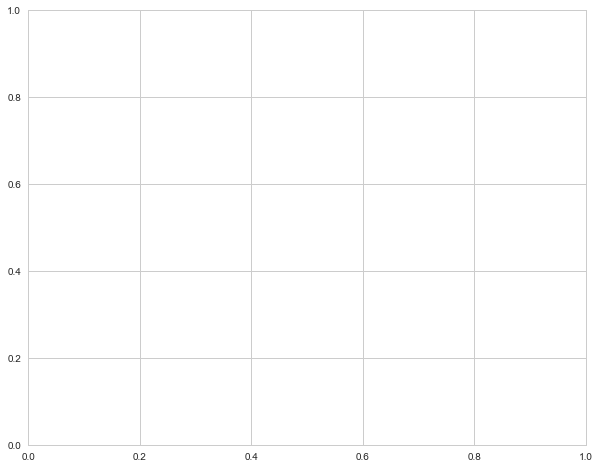

In [16]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(figsize=(10,8))
ax = sns.regplot(data=win_trace_50_samples.reset_index(), x='index', y='bot1', color='b')
ax.set(xlabel='Epochs', ylabel='bot1_wins')
plt.show()

NameError: name 'win_trace_50_samples' is not defined

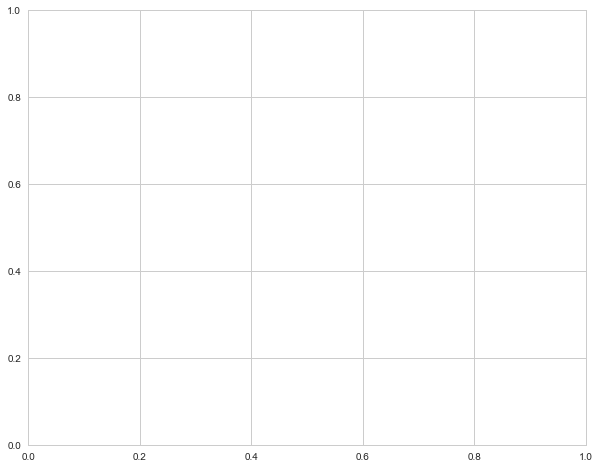

In [17]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(figsize=(10,8))
ax = sns.regplot(data=win_trace_50_samples.reset_index(), x='index', y='bot2', color='g')
ax.set(xlabel='Epochs', ylabel='bot2_wins')
plt.show()